# Ion Count Analysis

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import peakutils
import pandas as pd
from scipy.optimize import curve_fit
import scipy.stats
import math
from massspec import *
from scipy.integrate import simps
from random import randint

In [5]:
import Line_.fit as myfit

In [6]:
linmod = myfit.lmfitModels.ConstantModel()

In [7]:
powLawModel = myfit.lmfitModels.PowerLawModel()

In [148]:
LinearModel = myfit.lmfitModels.LinearModel()

In [8]:
direc = "N:\\4all\\mpsd_drive\\massspec\\VacuumDIVE\\ExperimentalData\\TOFData"

exp = AnalyzeAcq(direc)

In [9]:
sample = "100 $\mu$M bradykinin"

In [10]:
substrate = "silicon"

In [11]:
date = "2020-09-21"

In [12]:
data = exp.load_data(date, subset=[17])[0] # 

0 : 17.signal.div


In [13]:
h = exp.read_header(data)

t = exp.time(h)
    
voltages = exp.read_frames(data, h, average=False)  

voltages_mean = exp.read_frames(data, h)  
    
params = [16000, 14500, 0.004, 0.047, 1.168]

mz, v = exp.m2z(t, voltages_mean, params)

In [14]:
# pulse_E_dict = exp.get_pulse_energies(date, "1026nm")
# pulse_E = [e for p, e in pulse_E_dict.items() if p == '70mW']
# print(pulse_E)

In [15]:
def gauss(x, a, mu, sigma, offset):
    return a*(np.exp(-(x-mu)**2/(2*sigma**2))) + offset

# Manually Identify ~10 spectra w/ bradykinin peaks of similar peak intensity and do a  gaussian fit.

In [16]:
#intensity_30 = sorted([23, 20, 18, 49, 78, 77, 74, 68, 67, 66, 125, 117, 102, 95, 90]) #date = "2020-02-19"

In [17]:
#intensity_30 = sorted([28,29,30,41,42,43,45,46,48,50,52,60,65]) #date = "2020-02-20", silicon, data set 8 too noisy!!

In [18]:
#intensity_30 = sorted([4,5,6,7,11,27,41,48,53,57]) #date = "2020-02-20", silicon, data set 11!!

In [19]:
#intensity_30 = sorted([150,152,190,232,269,270,273,318,358]) #date = "2020-10-06", silicon, data set 05!!

In [20]:
#intensity_30 = sorted([533]) #date = "2020-03-04", silicon, data set 04!!

In [21]:
#intensity_30 = sorted([82,86,88,89,97,98,100,104,106]) #10 mM!! date = "2020-08-28", silicon, data set 11!!

In [22]:
#intensity_30 = sorted([85,87,93,169,255,257,261,301,305,341,]) #1 mM!! date = "2020-09-08", silicon, data set 11!!

In [23]:
intensity_30 = sorted([153,167,227,282,285,328,346,359,364,538,539,541,550,551,574,576,580,581,582,599]) #1 mM!! date = "2020-09-21", silicon, data set 17!!

In [24]:
intensity_30 = sorted([153,167,227,285,328,346,359,364,398,405,449,538,539,541,550,551,574,576,580,581]) #1 mM!! date = "2020-09-21", silicon, data set 17!!

In [25]:
#intensity_30 = [randint(0, int(h['nFramesCount'][0])) for i in list(range(0, 20))]

In [26]:
#min(intensity_30)

In [27]:
#intensity_30=intensity_30.pop(offset_30.index(min(offset_30)))

In [28]:
#intensity_30

In [29]:
# #CHECK WHETHER THE RIGHT SPECTRA ARE CHOOSEN 
# %matplotlib qt
# for i in intensity_30:
#     plt.figure()
#     plt.plot(t, voltages[i])
#     plt.title(f"{i}")
#     plt.show()

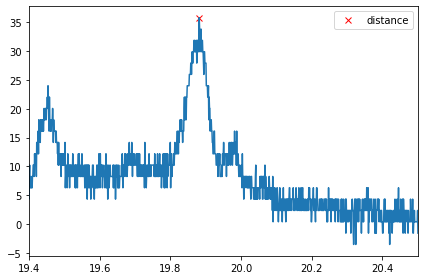

In [30]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np

Frequency = t[19000:21000]
Spectrum = voltages[35][19000:21000]

peaks, _ = find_peaks(Spectrum, distance=2000, height=30)
plt.plot(Frequency[peaks], Spectrum[peaks], "xr")
plt.plot(Frequency, Spectrum)
plt.legend(['bradykinin'])
plt.tight_layout()
plt.xlim(19.4,20.5)
plt.show()

In [59]:
bradykinin_xvalues = [find_peaks(voltages[i][19000:21000], distance=2000, height=30) for i in list(range(0,h['nFramesCount'][0]))]

In [60]:
mean_flight_time = []
index = []
index2 = []
for i in list(range(0,h['nFramesCount'][0])):
    index.append(i)
    try:
        mean_flight_time.append(bradykinin_xvalues[i][0][0])
    except:
        index2.append("empty")

In [61]:
np.mean(mean_flight_time)

879.6921898928025

(array([  1.,   1.,  14.,  35.,  81., 174., 197., 111.,  34.]),
 array([850, 855, 860, 865, 870, 875, 880, 885, 890, 895]),
 <BarContainer object of 9 artists>)

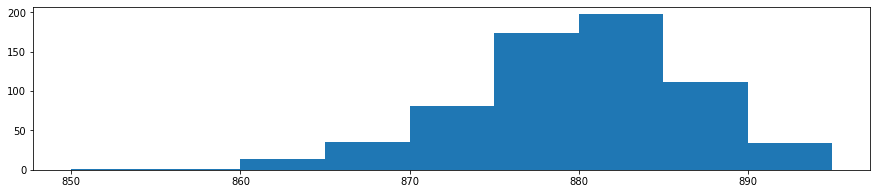

In [62]:
plt.figure(figsize=(15,3))
plt.hist(mean_flight_time, bins=list(range(850, 900, 5)))

In [63]:
bradykinin_xvalues = [find_peaks(voltages[i][19000:21000], distance=2000, height=30) for i in list(range(0,h['nFramesCount'][0]))]

In [64]:
mean_flight_time2 = []
index = []
for i in list(range(0,h['nFramesCount'][0])):
    index.append(i)
    try:
        x = bradykinin_xvalues[i][0][0]
        mean_flight_time2.append(bradykinin_xvalues[i][0][0])
    except:
        mean_flight_time2.append("empty")

In [65]:
flight_time = { i : mean_flight_time2[i] for i in list(range(0, h['nFramesCount'][0])) }
flight_time

{0: 'empty',
 1: 'empty',
 2: 'empty',
 3: 'empty',
 4: 'empty',
 5: 'empty',
 6: 'empty',
 7: 'empty',
 8: 'empty',
 9: 'empty',
 10: 'empty',
 11: 'empty',
 12: 'empty',
 13: 'empty',
 14: 'empty',
 15: 'empty',
 16: 'empty',
 17: 'empty',
 18: 'empty',
 19: 'empty',
 20: 'empty',
 21: 'empty',
 22: 'empty',
 23: 'empty',
 24: 'empty',
 25: 'empty',
 26: 'empty',
 27: 879,
 28: 'empty',
 29: 881,
 30: 883,
 31: 'empty',
 32: 877,
 33: 880,
 34: 'empty',
 35: 882,
 36: 888,
 37: 891,
 38: 'empty',
 39: 'empty',
 40: 'empty',
 41: 'empty',
 42: 'empty',
 43: 'empty',
 44: 'empty',
 45: 'empty',
 46: 'empty',
 47: 'empty',
 48: 'empty',
 49: 'empty',
 50: 'empty',
 51: 'empty',
 52: 'empty',
 53: 'empty',
 54: 'empty',
 55: 'empty',
 56: 'empty',
 57: 'empty',
 58: 'empty',
 59: 'empty',
 60: 'empty',
 61: 'empty',
 62: 882,
 63: 850,
 64: 872,
 65: 'empty',
 66: 'empty',
 67: 867,
 68: 'empty',
 69: 'empty',
 70: 'empty',
 71: 'empty',
 72: 'empty',
 73: 'empty',
 74: 'empty',
 75: 'em

In [66]:
#21.07.2021 first run with that adjustment 878<time<880: here three bin in the middle show som scatter outside the trendline
#878<time<880
#879<time<881: also here same bins are outlier
#880<time<882 looks  fine. no bin outlier visible, but the fit line is more linear than quadratic
#881<time<882 fitting not possible.
#882<time<884 looks fine, fit might be even quadratic
#883<tine<885 the middle bins are once again outliers. fitting not possible
#884<time<886 not true outliers but the scattering is complex and therefore the fit function looks weird
#885<time<887 looks more like a linear fit, no outliers


In [67]:
spectra_equal_time_flight = []
spectra_out_of_the_flight_time = []
for index, time in flight_time.items():
    try:
        if 882<time<884:
            spectra_equal_time_flight.append(index)
    except:
        spectra_out_of_the_flight_time.append(index)
len(spectra_equal_time_flight)

36

In [68]:
intensity_30 = spectra_equal_time_flight #1 mM!! date = "2020-09-21", silicon, data set 17!!


# Average of the mass spectra before the binning. Average performed with np.mean on all mass spectra in the dataset intensity_30

In [73]:
#Function allows to make an average mass spectrum for several single shots
def choosen_average():
    choosen_average = []
    for i in intensity_30:
        spectrum = exp.read_single_frame(data,h,i)
        choosen_average.append(spectrum)
        #choosen_average=np.asarray(choosen_average)
    return np.mean(choosen_average, axis=0)

In [74]:
choosen_average()

array([-2.01224847, -1.9575678 , -2.06692913, ..., -1.62948381,
       -2.17629046, -2.66841645])

In [75]:
popt_30, pcov_30, stdevs_30, fit_30, res_30 = [], [], [], [], []

for i in intensity_30:
    a = curve_fit(gauss, t, voltages[i], p0=[20, 19.8, 0.05, 20])
    popt_30.append(a[0])
    pcov_30.append(a[1])
    stdevs_30.append(np.sqrt(np.diag(a[1])))
    fit = gauss(t, *a[0])
    fit_30.append(fit)
    res_30.append(voltages[i] - choosen_average())

In [76]:
# %matplotlib qt
# for ind, i in enumerate(intensity_30):
#     fig, [ax1,ax2] = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

#     ax1.plot(t, voltages[i], marker='x', ls='')
#     ax1.plot(t, choosen_average())
#     ax1.set_xlim((19,21))
#     ax1.set_ylim((-30, 150))
#     ax2.set_xlabel("$t$ [$\mu$s]")
#     ax2.set_ylabel("Voltage [mV]")
#     ax1.set_title(f"{i}")
    
#     ax2.set_title("Residuals")
#     ax2.scatter(t, res_30[ind], color='red')
#     ax2.set_xlim((19,21))
#     ax2.set_ylim((-30, 30))
#     ax2.set_xlabel("$t$")
#     ax2.set_ylabel("Residuals")
#     plt.show()

# Residuals from Gaussian Fit

In [77]:
popt_30, pcov_30, stdevs_30, fit_30, res_30 = [], [], [], [], []

for i in intensity_30:
    a = curve_fit(gauss, t, voltages[i], p0=[20, 19.8, 0.05, 20])
    popt_30.append(a[0])
    pcov_30.append(a[1])
    stdevs_30.append(np.sqrt(np.diag(a[1])))
    fit = gauss(t, *a[0])
    fit_30.append(fit)
    res_30.append(voltages[i] - fit)
    

In [78]:
# %matplotlib qt
# for ind, i in enumerate(intensity_30):
#     fig, [ax1,ax2] = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

#     ax1.plot(t, voltages[i], marker='x', ls='')
#     ax1.plot(t, fit_30[ind])
#     ax1.set_xlim((19,22.5))
#     ax1.set_ylim((-30, 150))
#     ax2.set_xlabel("$t$ [$\mu$s]")
#     ax2.set_ylabel("Voltage [$\mu$V]")
#     ax1.set_title(f"{i}")
    
#     ax2.set_title("Residuals")
#     ax2.scatter(t, res_30[ind], color='red')
#     ax2.set_xlim((19,22.5))
#     ax2.set_ylim((-100, 100))
#     ax2.set_xlabel("$t$")
#     ax2.set_ylabel("Residuals")
#     plt.show()

# Quantify the noise in the baseline.
1. Investigate the noise
2. Calculate baseline and noise

In [79]:
vals = np.unique(voltages[1][35000:])
print(vals)

[-7.48031496 -5.51181102 -3.54330709 -1.57480315  0.39370079  2.36220472]


plt.hist(voltages[3][35000:]) First number is for the single shot mass spectrum. 35k refers to nanoseconds. In almost all cases the mass spectrom was recorded in a time frame of 40k nanoseconds

In [80]:
# bins = [-8.5,-6.5,-4.5,-2.5,-0.5,1.5,3.5]
# fontsize=24
# plt.figure(figsize=(15,10))
# Number_of_the_MS = 400
# n_noise, bins_noise, patches_noise = plt.hist(voltages[Number_of_the_MS][35000:], bins=bins, edgecolor='k')
# plt.title(f"Last 5 $\mu$s of shot {Number_of_the_MS}",fontsize=fontsize)
# plt.xticks(bins,  fontsize=fontsize)
# plt.yticks(fontsize=fontsize)
# plt.xlabel('Voltage [mV]', fontsize=fontsize)
# plt.ylabel('# of data points',  fontsize=fontsize)
# # plt.savefig('system_noise_histogram.png', bbox_inches='tight')
# plt.show()

Actuall numbers for the previous histogram

In [81]:
# for i in range(len(bins_noise) - 1):
#     print(f"[{bins_noise[i]},{bins_noise[i+1]}) : {n_noise[i]}")

In [82]:
baseline_30, noise_30 = [], []

for i in intensity_30:
    base = np.mean(voltages[i][35000:])
    noise = np.std(voltages[i][35000:])
    baseline_30.append(base)
    noise_30.append(noise)
    print(i, base, noise)

30 -1.8889763779527509 1.5596314452140465
175 -2.3102362204724334 1.551529598328104
210 -1.6562992125984213 1.5259220366309951
213 -1.8653543307086555 1.5482683792772867
275 -1.7633858267716496 1.5527770178724623
325 -1.7271653543307053 1.570625906679066
363 -2.0381889763779464 1.5668930771778278
368 -1.9283464566929085 1.577438542899431
422 -2.2118110236220403 1.5615622488243273
479 -1.8389763779527508 1.5537350073886187
522 -1.8854330708661364 1.5410999302374773
575 -2.041732283464561 1.557155248992505
578 -1.9523622047244036 1.5487670071248463
581 -1.7751968503936961 1.5402669216224643
585 -1.822440944881885 1.5484687405662556
589 -1.725196850393697 1.5646362759994135
594 -1.8181102362204675 1.5613637166635055
606 -1.758267716535429 1.5645752509200044
671 -1.955118110236215 1.5878809346836094
675 -1.9846456692913332 1.5689516781018797
727 -1.7590551181102316 1.5629958944003324
737 -1.9555118110236158 1.5283457974822723
739 -2.0181102362204664 1.5501077464705546
744 -2.47598425196849

In [83]:
# #plots the noise and the standard deviation of the mass spectrum. the initial 
# #number is defined with a variable called Number_of_the_MS, and can be found
# #some lines before
# plt.figure(figsize=(15,10))
# plt.title(f"Last 5 $\mu$s of shot {Number_of_the_MS}", fontsize=fontsize)
# plt.plot(t[35000:], voltages[Number_of_the_MS][35000:], zorder=0)
# plt.hlines(baseline_30[0], t[35000], t[-1], label='baseline')
# plt.hlines(baseline_30[0]+noise_30[0], t[35000], t[-1], ls='dashed', label='noise, 1$\sigma$', color="red")
# plt.hlines(baseline_30[0]-noise_30[0], t[35000], t[-1], ls='dashed', label='noise, 1$\sigma$', color="red")
# plt.xticks(fontsize=24)
# plt.yticks(fontsize=24)
# plt.xlabel("$t$ [${\mu}$s]", fontsize=fontsize)
# plt.ylabel("Voltage [mV]", fontsize=fontsize)
# plt.legend(loc='upper right', fontsize=fontsize)
# # plt.savefig("system_baseline_noise.png", bbox_inches='tight')

# plt.show()

### 1. Isolate bradykinin peak data points.

### 2. Downsize the data by half through binning/resampling.

In [84]:
t1_frame = 19800
t2_frame = 19960
t_30 = t[t1_frame:t2_frame]

v_30 = []

for i in intensity_30:
    v_30.append(voltages[i][t1_frame:t2_frame])

In [85]:
dfs = []

# Create dataframes with time disguised in units of seconds (pandas can't do microseconds with multidecimal precision)
for v in v_30:
    df = pd.DataFrame({'time': pd.to_timedelta(t_30, unit='s'),
                      'voltage': v})
    display(df.head())
    dfs.append(df)
print(len(dfs))

,time,voltage
0,0 days 00:00:19.800000,10.236220
1,0 days 00:00:19.801000,10.236220
2,0 days 00:00:19.802000,12.204724
3,0 days 00:00:19.803000,8.267717
4,0 days 00:00:19.804000,14.173228


,time,voltage
0,0 days 00:00:19.800000,18.110236
1,0 days 00:00:19.801000,16.141732
2,0 days 00:00:19.802000,16.141732
3,0 days 00:00:19.803000,14.173228
4,0 days 00:00:19.804000,16.141732


,time,voltage
0,0 days 00:00:19.800000,10.236220
1,0 days 00:00:19.801000,8.267717
2,0 days 00:00:19.802000,10.236220
3,0 days 00:00:19.803000,10.236220
4,0 days 00:00:19.804000,10.236220


,time,voltage
0,0 days 00:00:19.800000,10.236220
1,0 days 00:00:19.801000,8.267717
2,0 days 00:00:19.802000,8.267717
3,0 days 00:00:19.803000,8.267717
4,0 days 00:00:19.804000,10.236220


,time,voltage
0,0 days 00:00:19.800000,14.173228
1,0 days 00:00:19.801000,12.204724
2,0 days 00:00:19.802000,10.236220
3,0 days 00:00:19.803000,10.236220
4,0 days 00:00:19.804000,12.204724


,time,voltage
0,0 days 00:00:19.800000,18.110236
1,0 days 00:00:19.801000,16.141732
2,0 days 00:00:19.802000,22.047244
3,0 days 00:00:19.803000,18.110236
4,0 days 00:00:19.804000,20.078740


,time,voltage
0,0 days 00:00:19.800000,16.141732
1,0 days 00:00:19.801000,20.078740
2,0 days 00:00:19.802000,18.110236
3,0 days 00:00:19.803000,18.110236
4,0 days 00:00:19.804000,16.141732


,time,voltage
0,0 days 00:00:19.800000,20.078740
1,0 days 00:00:19.801000,18.110236
2,0 days 00:00:19.802000,20.078740
3,0 days 00:00:19.803000,18.110236
4,0 days 00:00:19.804000,18.110236


,time,voltage
0,0 days 00:00:19.800000,18.110236
1,0 days 00:00:19.801000,20.078740
2,0 days 00:00:19.802000,20.078740
3,0 days 00:00:19.803000,22.047244
4,0 days 00:00:19.804000,20.078740


,time,voltage
0,0 days 00:00:19.800000,14.173228
1,0 days 00:00:19.801000,14.173228
2,0 days 00:00:19.802000,14.173228
3,0 days 00:00:19.803000,12.204724
4,0 days 00:00:19.804000,16.141732


,time,voltage
0,0 days 00:00:19.800000,14.173228
1,0 days 00:00:19.801000,12.204724
2,0 days 00:00:19.802000,12.204724
3,0 days 00:00:19.803000,10.236220
4,0 days 00:00:19.804000,16.141732


,time,voltage
0,0 days 00:00:19.800000,14.173228
1,0 days 00:00:19.801000,12.204724
2,0 days 00:00:19.802000,10.236220
3,0 days 00:00:19.803000,10.236220
4,0 days 00:00:19.804000,10.236220


,time,voltage
0,0 days 00:00:19.800000,14.173228
1,0 days 00:00:19.801000,12.204724
2,0 days 00:00:19.802000,10.236220
3,0 days 00:00:19.803000,14.173228
4,0 days 00:00:19.804000,14.173228


,time,voltage
0,0 days 00:00:19.800000,14.173228
1,0 days 00:00:19.801000,14.173228
2,0 days 00:00:19.802000,14.173228
3,0 days 00:00:19.803000,14.173228
4,0 days 00:00:19.804000,14.173228


,time,voltage
0,0 days 00:00:19.800000,18.110236
1,0 days 00:00:19.801000,16.141732
2,0 days 00:00:19.802000,18.110236
3,0 days 00:00:19.803000,20.078740
4,0 days 00:00:19.804000,20.078740


,time,voltage
0,0 days 00:00:19.800000,12.204724
1,0 days 00:00:19.801000,10.236220
2,0 days 00:00:19.802000,12.204724
3,0 days 00:00:19.803000,12.204724
4,0 days 00:00:19.804000,12.204724


,time,voltage
0,0 days 00:00:19.800000,8.267717
1,0 days 00:00:19.801000,6.299213
2,0 days 00:00:19.802000,6.299213
3,0 days 00:00:19.803000,6.299213
4,0 days 00:00:19.804000,8.267717


,time,voltage
0,0 days 00:00:19.800000,12.204724
1,0 days 00:00:19.801000,12.204724
2,0 days 00:00:19.802000,8.267717
3,0 days 00:00:19.803000,12.204724
4,0 days 00:00:19.804000,10.236220


,time,voltage
0,0 days 00:00:19.800000,12.204724
1,0 days 00:00:19.801000,12.204724
2,0 days 00:00:19.802000,10.236220
3,0 days 00:00:19.803000,14.173228
4,0 days 00:00:19.804000,10.236220


,time,voltage
0,0 days 00:00:19.800000,14.173228
1,0 days 00:00:19.801000,14.173228
2,0 days 00:00:19.802000,14.173228
3,0 days 00:00:19.803000,14.173228
4,0 days 00:00:19.804000,12.204724


,time,voltage
0,0 days 00:00:19.800000,12.204724
1,0 days 00:00:19.801000,12.204724
2,0 days 00:00:19.802000,14.173228
3,0 days 00:00:19.803000,14.173228
4,0 days 00:00:19.804000,12.204724


,time,voltage
0,0 days 00:00:19.800000,16.141732
1,0 days 00:00:19.801000,16.141732
2,0 days 00:00:19.802000,14.173228
3,0 days 00:00:19.803000,18.110236
4,0 days 00:00:19.804000,18.110236


,time,voltage
0,0 days 00:00:19.800000,12.204724
1,0 days 00:00:19.801000,12.204724
2,0 days 00:00:19.802000,12.204724
3,0 days 00:00:19.803000,12.204724
4,0 days 00:00:19.804000,12.204724


,time,voltage
0,0 days 00:00:19.800000,18.110236
1,0 days 00:00:19.801000,18.110236
2,0 days 00:00:19.802000,20.078740
3,0 days 00:00:19.803000,20.078740
4,0 days 00:00:19.804000,20.078740


,time,voltage
0,0 days 00:00:19.800000,16.141732
1,0 days 00:00:19.801000,14.173228
2,0 days 00:00:19.802000,16.141732
3,0 days 00:00:19.803000,14.173228
4,0 days 00:00:19.804000,16.141732


,time,voltage
0,0 days 00:00:19.800000,14.173228
1,0 days 00:00:19.801000,14.173228
2,0 days 00:00:19.802000,14.173228
3,0 days 00:00:19.803000,16.141732
4,0 days 00:00:19.804000,14.173228


,time,voltage
0,0 days 00:00:19.800000,14.173228
1,0 days 00:00:19.801000,14.173228
2,0 days 00:00:19.802000,14.173228
3,0 days 00:00:19.803000,12.204724
4,0 days 00:00:19.804000,14.173228


,time,voltage
0,0 days 00:00:19.800000,18.110236
1,0 days 00:00:19.801000,16.141732
2,0 days 00:00:19.802000,14.173228
3,0 days 00:00:19.803000,14.173228
4,0 days 00:00:19.804000,16.141732


,time,voltage
0,0 days 00:00:19.800000,22.047244
1,0 days 00:00:19.801000,22.047244
2,0 days 00:00:19.802000,20.078740
3,0 days 00:00:19.803000,24.015748
4,0 days 00:00:19.804000,22.047244


,time,voltage
0,0 days 00:00:19.800000,16.141732
1,0 days 00:00:19.801000,16.141732
2,0 days 00:00:19.802000,16.141732
3,0 days 00:00:19.803000,20.078740
4,0 days 00:00:19.804000,20.078740


,time,voltage
0,0 days 00:00:19.800000,29.921260
1,0 days 00:00:19.801000,29.921260
2,0 days 00:00:19.802000,31.889764
3,0 days 00:00:19.803000,31.889764
4,0 days 00:00:19.804000,29.921260


,time,voltage
0,0 days 00:00:19.800000,16.141732
1,0 days 00:00:19.801000,24.015748
2,0 days 00:00:19.802000,20.078740
3,0 days 00:00:19.803000,20.078740
4,0 days 00:00:19.804000,20.078740


,time,voltage
0,0 days 00:00:19.800000,25.984252
1,0 days 00:00:19.801000,24.015748
2,0 days 00:00:19.802000,22.047244
3,0 days 00:00:19.803000,25.984252
4,0 days 00:00:19.804000,25.984252


,time,voltage
0,0 days 00:00:19.800000,10.236220
1,0 days 00:00:19.801000,12.204724
2,0 days 00:00:19.802000,8.267717
3,0 days 00:00:19.803000,8.267717
4,0 days 00:00:19.804000,10.236220


,time,voltage
0,0 days 00:00:19.800000,14.173228
1,0 days 00:00:19.801000,14.173228
2,0 days 00:00:19.802000,14.173228
3,0 days 00:00:19.803000,14.173228
4,0 days 00:00:19.804000,16.141732


,time,voltage
0,0 days 00:00:19.800000,4.330709
1,0 days 00:00:19.801000,8.267717
2,0 days 00:00:19.802000,4.330709
3,0 days 00:00:19.803000,6.299213
4,0 days 00:00:19.804000,8.267717


36


In [86]:
# Resample by taking the sum of every pair of consecutive points

dfs_resampled = []

for d in dfs:
    df = d.resample(rule='2ms', on='time').sum()
    print(len(df))
    display(df.head())
    dfs_resampled.append(df)

80


,voltage
time,
0 days 00:00:19.800000,20.472441
0 days 00:00:19.802000,20.472441
0 days 00:00:19.804000,24.409449
0 days 00:00:19.806000,26.377953
0 days 00:00:19.808000,22.440945


80


,voltage
time,
0 days 00:00:19.800000,34.251969
0 days 00:00:19.802000,30.314961
0 days 00:00:19.804000,30.314961
0 days 00:00:19.806000,32.283465
0 days 00:00:19.808000,32.283465


80


,voltage
time,
0 days 00:00:19.800000,18.503937
0 days 00:00:19.802000,20.472441
0 days 00:00:19.804000,20.472441
0 days 00:00:19.806000,20.472441
0 days 00:00:19.808000,16.535433


80


,voltage
time,
0 days 00:00:19.800000,18.503937
0 days 00:00:19.802000,16.535433
0 days 00:00:19.804000,22.440945
0 days 00:00:19.806000,22.440945
0 days 00:00:19.808000,20.472441


80


,voltage
time,
0 days 00:00:19.800000,26.377953
0 days 00:00:19.802000,20.472441
0 days 00:00:19.804000,26.377953
0 days 00:00:19.806000,28.346457
0 days 00:00:19.808000,26.377953


80


,voltage
time,
0 days 00:00:19.800000,34.251969
0 days 00:00:19.802000,40.157480
0 days 00:00:19.804000,38.188976
0 days 00:00:19.806000,40.157480
0 days 00:00:19.808000,40.157480


80


,voltage
time,
0 days 00:00:19.800000,36.220472
0 days 00:00:19.802000,36.220472
0 days 00:00:19.804000,30.314961
0 days 00:00:19.806000,38.188976
0 days 00:00:19.808000,38.188976


80


,voltage
time,
0 days 00:00:19.800000,38.188976
0 days 00:00:19.802000,38.188976
0 days 00:00:19.804000,36.220472
0 days 00:00:19.806000,48.031496
0 days 00:00:19.808000,46.062992


80


,voltage
time,
0 days 00:00:19.800000,38.188976
0 days 00:00:19.802000,42.125984
0 days 00:00:19.804000,42.125984
0 days 00:00:19.806000,42.125984
0 days 00:00:19.808000,48.031496


80


,voltage
time,
0 days 00:00:19.800000,28.346457
0 days 00:00:19.802000,26.377953
0 days 00:00:19.804000,32.283465
0 days 00:00:19.806000,32.283465
0 days 00:00:19.808000,28.346457


80


,voltage
time,
0 days 00:00:19.800000,26.377953
0 days 00:00:19.802000,22.440945
0 days 00:00:19.804000,28.346457
0 days 00:00:19.806000,30.314961
0 days 00:00:19.808000,28.346457


80


,voltage
time,
0 days 00:00:19.800000,26.377953
0 days 00:00:19.802000,20.472441
0 days 00:00:19.804000,20.472441
0 days 00:00:19.806000,26.377953
0 days 00:00:19.808000,22.440945


80


,voltage
time,
0 days 00:00:19.800000,26.377953
0 days 00:00:19.802000,24.409449
0 days 00:00:19.804000,26.377953
0 days 00:00:19.806000,26.377953
0 days 00:00:19.808000,24.409449


80


,voltage
time,
0 days 00:00:19.800000,28.346457
0 days 00:00:19.802000,28.346457
0 days 00:00:19.804000,32.283465
0 days 00:00:19.806000,32.283465
0 days 00:00:19.808000,30.314961


80


,voltage
time,
0 days 00:00:19.800000,34.251969
0 days 00:00:19.802000,38.188976
0 days 00:00:19.804000,40.157480
0 days 00:00:19.806000,42.125984
0 days 00:00:19.808000,40.157480


80


,voltage
time,
0 days 00:00:19.800000,22.440945
0 days 00:00:19.802000,24.409449
0 days 00:00:19.804000,22.440945
0 days 00:00:19.806000,26.377953
0 days 00:00:19.808000,28.346457


80


,voltage
time,
0 days 00:00:19.800000,14.566929
0 days 00:00:19.802000,12.598425
0 days 00:00:19.804000,14.566929
0 days 00:00:19.806000,14.566929
0 days 00:00:19.808000,12.598425


80


,voltage
time,
0 days 00:00:19.800000,24.409449
0 days 00:00:19.802000,20.472441
0 days 00:00:19.804000,24.409449
0 days 00:00:19.806000,26.377953
0 days 00:00:19.808000,26.377953


80


,voltage
time,
0 days 00:00:19.800000,24.409449
0 days 00:00:19.802000,24.409449
0 days 00:00:19.804000,22.440945
0 days 00:00:19.806000,26.377953
0 days 00:00:19.808000,28.346457


80


,voltage
time,
0 days 00:00:19.800000,28.346457
0 days 00:00:19.802000,28.346457
0 days 00:00:19.804000,24.409449
0 days 00:00:19.806000,26.377953
0 days 00:00:19.808000,34.251969


80


,voltage
time,
0 days 00:00:19.800000,24.409449
0 days 00:00:19.802000,28.346457
0 days 00:00:19.804000,22.440945
0 days 00:00:19.806000,26.377953
0 days 00:00:19.808000,28.346457


80


,voltage
time,
0 days 00:00:19.800000,32.283465
0 days 00:00:19.802000,32.283465
0 days 00:00:19.804000,30.314961
0 days 00:00:19.806000,30.314961
0 days 00:00:19.808000,36.220472


80


,voltage
time,
0 days 00:00:19.800000,24.409449
0 days 00:00:19.802000,24.409449
0 days 00:00:19.804000,24.409449
0 days 00:00:19.806000,24.409449
0 days 00:00:19.808000,22.440945


80


,voltage
time,
0 days 00:00:19.800000,36.220472
0 days 00:00:19.802000,40.157480
0 days 00:00:19.804000,40.157480
0 days 00:00:19.806000,40.157480
0 days 00:00:19.808000,38.188976


80


,voltage
time,
0 days 00:00:19.800000,30.314961
0 days 00:00:19.802000,30.314961
0 days 00:00:19.804000,32.283465
0 days 00:00:19.806000,32.283465
0 days 00:00:19.808000,32.283465


80


,voltage
time,
0 days 00:00:19.800000,28.346457
0 days 00:00:19.802000,30.314961
0 days 00:00:19.804000,32.283465
0 days 00:00:19.806000,32.283465
0 days 00:00:19.808000,32.283465


80


,voltage
time,
0 days 00:00:19.800000,28.346457
0 days 00:00:19.802000,26.377953
0 days 00:00:19.804000,26.377953
0 days 00:00:19.806000,28.346457
0 days 00:00:19.808000,32.283465


80


,voltage
time,
0 days 00:00:19.800000,34.251969
0 days 00:00:19.802000,28.346457
0 days 00:00:19.804000,32.283465
0 days 00:00:19.806000,30.314961
0 days 00:00:19.808000,32.283465


80


,voltage
time,
0 days 00:00:19.800000,44.094488
0 days 00:00:19.802000,44.094488
0 days 00:00:19.804000,42.125984
0 days 00:00:19.806000,44.094488
0 days 00:00:19.808000,40.157480


80


,voltage
time,
0 days 00:00:19.800000,32.283465
0 days 00:00:19.802000,36.220472
0 days 00:00:19.804000,36.220472
0 days 00:00:19.806000,30.314961
0 days 00:00:19.808000,34.251969


80


,voltage
time,
0 days 00:00:19.800000,59.842520
0 days 00:00:19.802000,63.779528
0 days 00:00:19.804000,61.811024
0 days 00:00:19.806000,65.748031
0 days 00:00:19.808000,69.685039


80


,voltage
time,
0 days 00:00:19.800000,40.157480
0 days 00:00:19.802000,40.157480
0 days 00:00:19.804000,42.125984
0 days 00:00:19.806000,44.094488
0 days 00:00:19.808000,42.125984


80


,voltage
time,
0 days 00:00:19.800000,50.000000
0 days 00:00:19.802000,48.031496
0 days 00:00:19.804000,51.968504
0 days 00:00:19.806000,55.905512
0 days 00:00:19.808000,53.937008


80


,voltage
time,
0 days 00:00:19.800000,22.440945
0 days 00:00:19.802000,16.535433
0 days 00:00:19.804000,18.503937
0 days 00:00:19.806000,18.503937
0 days 00:00:19.808000,22.440945


80


,voltage
time,
0 days 00:00:19.800000,28.346457
0 days 00:00:19.802000,28.346457
0 days 00:00:19.804000,32.283465
0 days 00:00:19.806000,28.346457
0 days 00:00:19.808000,34.251969


80


,voltage
time,
0 days 00:00:19.800000,12.598425
0 days 00:00:19.802000,10.629921
0 days 00:00:19.804000,16.535433
0 days 00:00:19.806000,12.598425
0 days 00:00:19.808000,12.598425


In [87]:
len(dfs_resampled)

36

In [88]:
# Resampling turns the time column into the index column so a new time column must be inserted

for d in dfs_resampled:
    d.insert(0, 'time [us]', t[t1_frame:t2_frame:2])
    display(d.tail())

,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,22.440945
0 days 00:00:19.952000,19.952,24.409449
0 days 00:00:19.954000,19.954,20.472441
0 days 00:00:19.956000,19.956,24.409449
0 days 00:00:19.958000,19.958,20.472441


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,24.409449
0 days 00:00:19.952000,19.952,24.409449
0 days 00:00:19.954000,19.954,22.440945
0 days 00:00:19.956000,19.956,22.440945
0 days 00:00:19.958000,19.958,24.409449


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,20.472441
0 days 00:00:19.952000,19.952,22.440945
0 days 00:00:19.954000,19.954,24.409449
0 days 00:00:19.956000,19.956,24.409449
0 days 00:00:19.958000,19.958,22.440945


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,20.472441
0 days 00:00:19.952000,19.952,20.472441
0 days 00:00:19.954000,19.954,22.440945
0 days 00:00:19.956000,19.956,20.472441
0 days 00:00:19.958000,19.958,22.440945


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,22.440945
0 days 00:00:19.952000,19.952,26.377953
0 days 00:00:19.954000,19.954,26.377953
0 days 00:00:19.956000,19.956,24.409449
0 days 00:00:19.958000,19.958,26.377953


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,24.409449
0 days 00:00:19.952000,19.952,28.346457
0 days 00:00:19.954000,19.954,24.409449
0 days 00:00:19.956000,19.956,30.314961
0 days 00:00:19.958000,19.958,26.377953


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,30.314961
0 days 00:00:19.952000,19.952,28.346457
0 days 00:00:19.954000,19.954,30.314961
0 days 00:00:19.956000,19.956,30.314961
0 days 00:00:19.958000,19.958,32.283465


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,32.283465
0 days 00:00:19.952000,19.952,26.377953
0 days 00:00:19.954000,19.954,32.283465
0 days 00:00:19.956000,19.956,26.377953
0 days 00:00:19.958000,19.958,28.346457


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,30.314961
0 days 00:00:19.952000,19.952,32.283465
0 days 00:00:19.954000,19.954,34.251969
0 days 00:00:19.956000,19.956,34.251969
0 days 00:00:19.958000,19.958,34.251969


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,22.440945
0 days 00:00:19.952000,19.952,26.377953
0 days 00:00:19.954000,19.954,24.409449
0 days 00:00:19.956000,19.956,22.440945
0 days 00:00:19.958000,19.958,24.409449


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,22.440945
0 days 00:00:19.952000,19.952,24.409449
0 days 00:00:19.954000,19.954,20.472441
0 days 00:00:19.956000,19.956,24.409449
0 days 00:00:19.958000,19.958,22.440945


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,22.440945
0 days 00:00:19.952000,19.952,22.440945
0 days 00:00:19.954000,19.954,22.440945
0 days 00:00:19.956000,19.956,26.377953
0 days 00:00:19.958000,19.958,26.377953


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,24.409449
0 days 00:00:19.952000,19.952,26.377953
0 days 00:00:19.954000,19.954,24.409449
0 days 00:00:19.956000,19.956,24.409449
0 days 00:00:19.958000,19.958,24.409449


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,24.409449
0 days 00:00:19.952000,19.952,26.377953
0 days 00:00:19.954000,19.954,26.377953
0 days 00:00:19.956000,19.956,32.283465
0 days 00:00:19.958000,19.958,34.251969


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,24.409449
0 days 00:00:19.952000,19.952,28.346457
0 days 00:00:19.954000,19.954,26.377953
0 days 00:00:19.956000,19.956,28.346457
0 days 00:00:19.958000,19.958,24.409449


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,36.220472
0 days 00:00:19.952000,19.952,36.220472
0 days 00:00:19.954000,19.954,36.220472
0 days 00:00:19.956000,19.956,34.251969
0 days 00:00:19.958000,19.958,34.251969


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,14.566929
0 days 00:00:19.952000,19.952,14.566929
0 days 00:00:19.954000,19.954,14.566929
0 days 00:00:19.956000,19.956,14.566929
0 days 00:00:19.958000,19.958,20.472441


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,22.440945
0 days 00:00:19.952000,19.952,18.503937
0 days 00:00:19.954000,19.954,24.409449
0 days 00:00:19.956000,19.956,24.409449
0 days 00:00:19.958000,19.958,26.377953


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,30.314961
0 days 00:00:19.952000,19.952,28.346457
0 days 00:00:19.954000,19.954,28.346457
0 days 00:00:19.956000,19.956,24.409449
0 days 00:00:19.958000,19.958,28.346457


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,20.472441
0 days 00:00:19.952000,19.952,20.472441
0 days 00:00:19.954000,19.954,22.440945
0 days 00:00:19.956000,19.956,24.409449
0 days 00:00:19.958000,19.958,22.440945


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,16.535433
0 days 00:00:19.952000,19.952,20.472441
0 days 00:00:19.954000,19.954,22.440945
0 days 00:00:19.956000,19.956,24.409449
0 days 00:00:19.958000,19.958,24.409449


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,18.503937
0 days 00:00:19.952000,19.952,22.440945
0 days 00:00:19.954000,19.954,20.472441
0 days 00:00:19.956000,19.956,20.472441
0 days 00:00:19.958000,19.958,24.409449


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,18.503937
0 days 00:00:19.952000,19.952,18.503937
0 days 00:00:19.954000,19.954,20.472441
0 days 00:00:19.956000,19.956,22.440945
0 days 00:00:19.958000,19.958,16.535433


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,28.346457
0 days 00:00:19.952000,19.952,26.377953
0 days 00:00:19.954000,19.954,26.377953
0 days 00:00:19.956000,19.956,28.346457
0 days 00:00:19.958000,19.958,26.377953


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,34.251969
0 days 00:00:19.952000,19.952,26.377953
0 days 00:00:19.954000,19.954,32.283465
0 days 00:00:19.956000,19.956,34.251969
0 days 00:00:19.958000,19.958,34.251969


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,24.409449
0 days 00:00:19.952000,19.952,26.377953
0 days 00:00:19.954000,19.954,24.409449
0 days 00:00:19.956000,19.956,26.377953
0 days 00:00:19.958000,19.958,28.346457


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,18.503937
0 days 00:00:19.952000,19.952,24.409449
0 days 00:00:19.954000,19.954,24.409449
0 days 00:00:19.956000,19.956,26.377953
0 days 00:00:19.958000,19.958,24.409449


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,32.283465
0 days 00:00:19.952000,19.952,30.314961
0 days 00:00:19.954000,19.954,32.283465
0 days 00:00:19.956000,19.956,32.283465
0 days 00:00:19.958000,19.958,30.314961


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,36.220472
0 days 00:00:19.952000,19.952,36.220472
0 days 00:00:19.954000,19.954,34.251969
0 days 00:00:19.956000,19.956,34.251969
0 days 00:00:19.958000,19.958,34.251969


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,32.283465
0 days 00:00:19.952000,19.952,34.251969
0 days 00:00:19.954000,19.954,32.283465
0 days 00:00:19.956000,19.956,32.283465
0 days 00:00:19.958000,19.958,32.283465


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,46.062992
0 days 00:00:19.952000,19.952,48.031496
0 days 00:00:19.954000,19.954,50.000000
0 days 00:00:19.956000,19.956,48.031496
0 days 00:00:19.958000,19.958,51.968504


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,22.440945
0 days 00:00:19.952000,19.952,20.472441
0 days 00:00:19.954000,19.954,22.440945
0 days 00:00:19.956000,19.956,26.377953
0 days 00:00:19.958000,19.958,22.440945


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,36.220472
0 days 00:00:19.952000,19.952,40.157480
0 days 00:00:19.954000,19.954,40.157480
0 days 00:00:19.956000,19.956,42.125984
0 days 00:00:19.958000,19.958,44.094488


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,22.440945
0 days 00:00:19.952000,19.952,22.440945
0 days 00:00:19.954000,19.954,20.472441
0 days 00:00:19.956000,19.956,24.409449
0 days 00:00:19.958000,19.958,24.409449


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,30.314961
0 days 00:00:19.952000,19.952,26.377953
0 days 00:00:19.954000,19.954,30.314961
0 days 00:00:19.956000,19.956,30.314961
0 days 00:00:19.958000,19.958,36.220472


,time [us],voltage
time,,
0 days 00:00:19.950000,19.950,14.566929
0 days 00:00:19.952000,19.952,14.566929
0 days 00:00:19.954000,19.954,14.566929
0 days 00:00:19.956000,19.956,20.472441
0 days 00:00:19.958000,19.958,16.535433


t_30_rs and v_30_rs has to have the same length since both are plotted together in the upcoming lines. The step size indicated in these line of codes 
is used to minimize the amount of data points so the fittig of the gaussian function is better.

In [89]:
t_30_rs = t[t1_frame:t2_frame:8]
v_30_rs = []
for d in dfs_resampled:
    v = np.asarray(d['voltage'])
    v_30_rs.append(v)

In [90]:
v_30_rs2 = []
for i in v_30_rs:
    v_30_rs2.append(i[::4]) 

### Perform average mass spectrum fitting for every single shot mass spectrum

In [91]:
mean_mass_spectrum=np.mean(v_30_rs2, axis=0)
mean_mass_spectrum

array([29.93219598, 32.17410324, 35.45494313, 40.43088364, 46.77384077,
       54.48381452, 64.05293088, 73.18460192, 81.332021  , 85.65179353,
       87.67497813, 84.4488189 , 75.97331584, 64.59973753, 52.24190726,
       39.93875766, 31.62729659, 26.76071741, 24.35476815, 26.21391076])

In [92]:
popt_30, pcov_30, stdevs_30, fit_30, res_30 = [], [], [], [], []

for i in v_30_rs2:
    popt, pcov = curve_fit(gauss, t_30_rs, i, p0=[100, 19.9, 0.03, -20]) # p0 = [a, mu, sigma, offset]
    popt_30.append(popt)
    pcov_30.append(pcov)
    stdevs_30.append(np.sqrt(np.diag(pcov)))
    fit_30.append(mean_mass_spectrum)
    res_30.append(i - mean_mass_spectrum)

In [93]:
xlim1 = 19800
xlim2 = 19960
fit_30_2 = [i[xlim1:xlim2:8] for i in fit_30]

In [94]:
#Remove offset from data and fit.

offset_30 = [i[3]*0.6 for i in popt_30] #manually adjusted as the Gaussian offset is causing negative values

v_30_rs2 = [v_30_rs2[ind]-i for ind, i in enumerate(offset_30)]

fit_30 = [i-k for i in fit_30 for k in offset_30]

res_30 = [data - fit for data, fit in zip(v_30_rs2, fit_30)]

mean_mass_spectrum = mean_mass_spectrum-np.mean(offset_30)

In [95]:
offset_30.index(min(offset_30))

31

In [96]:
np.mean(offset_30)

13.877073070052356

In [97]:
%matplotlib inline

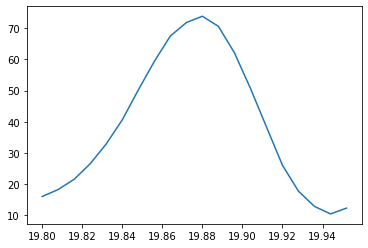

In [98]:
plt.plot(t_30_rs, mean_mass_spectrum)

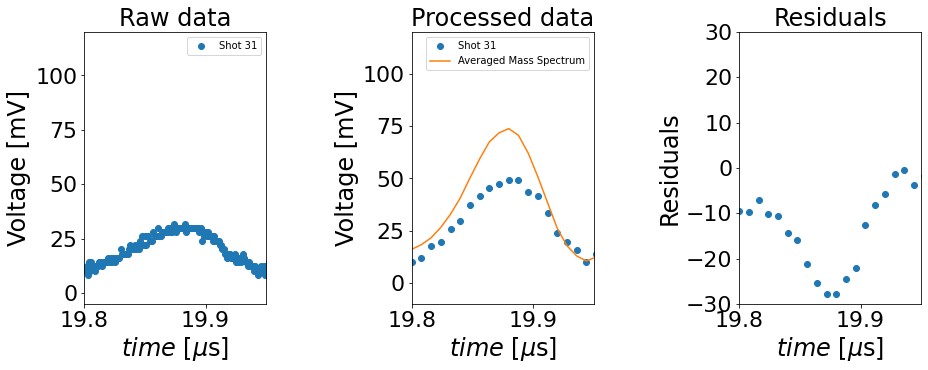

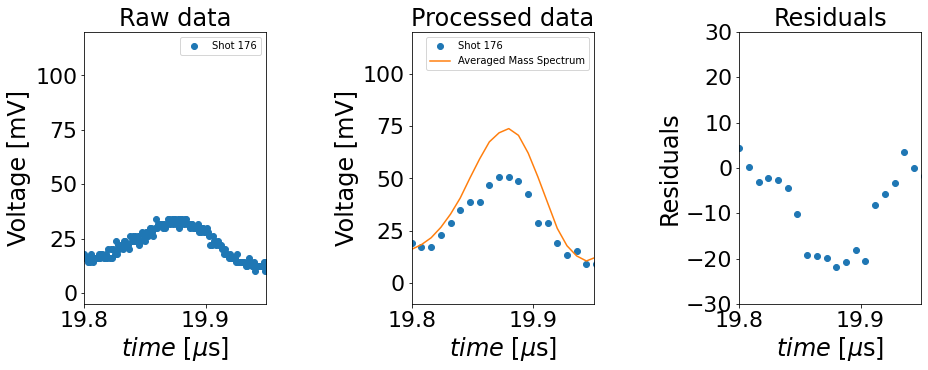

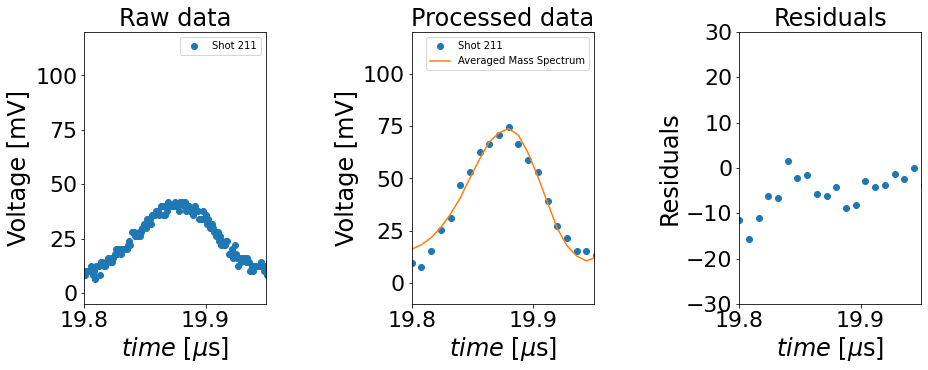

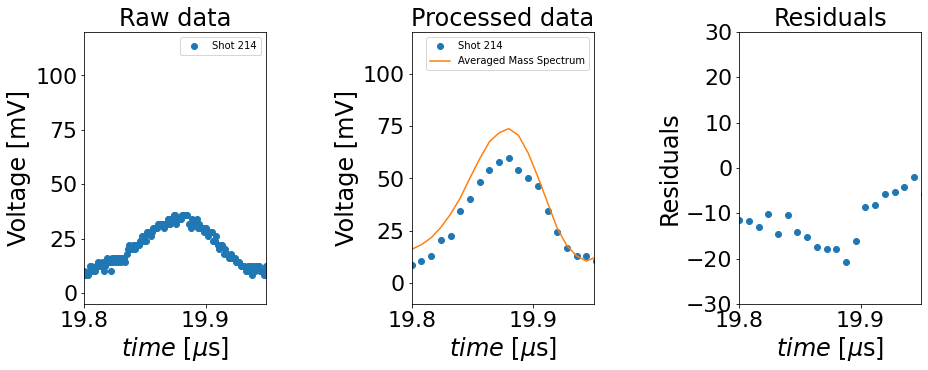

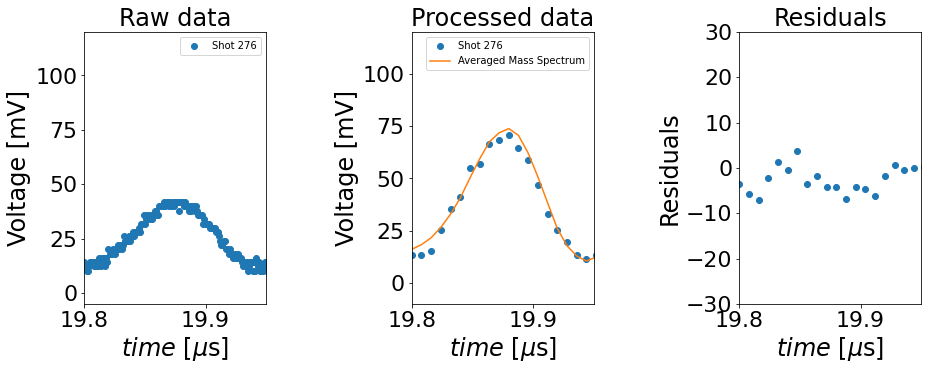

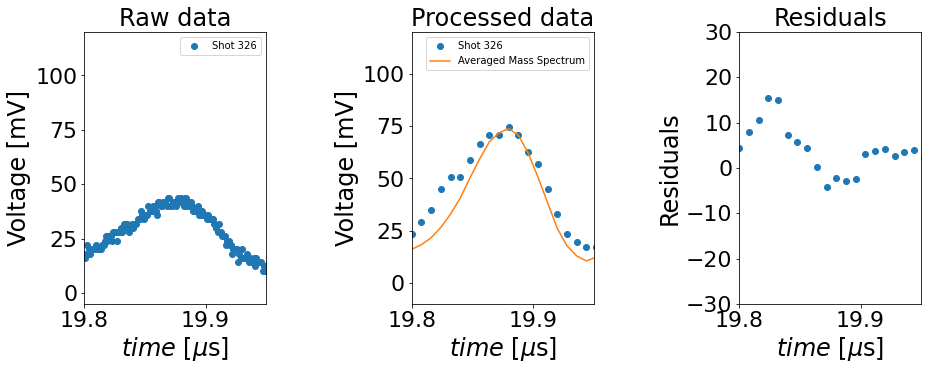

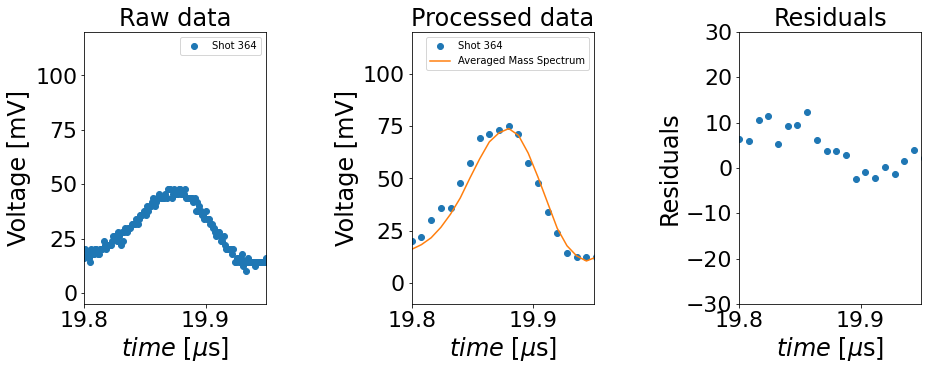

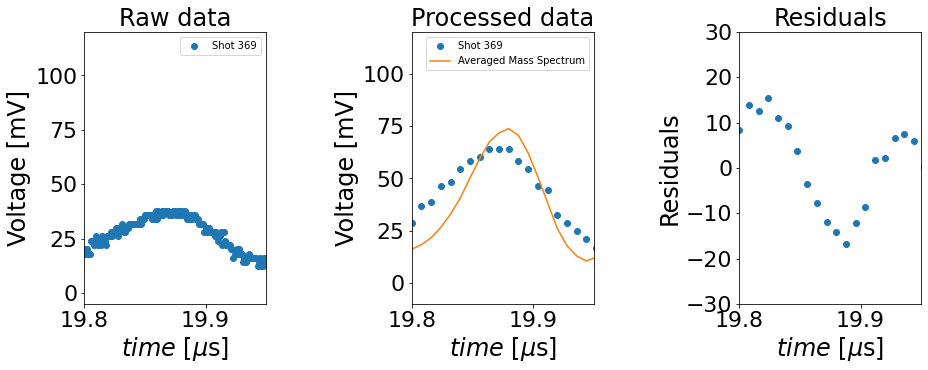

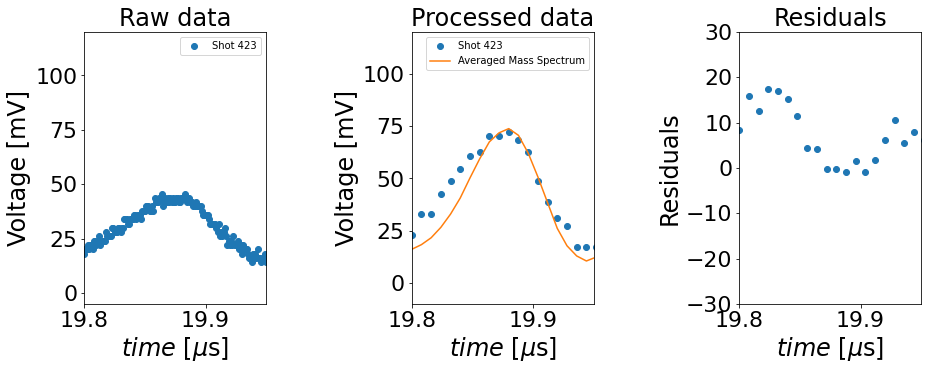

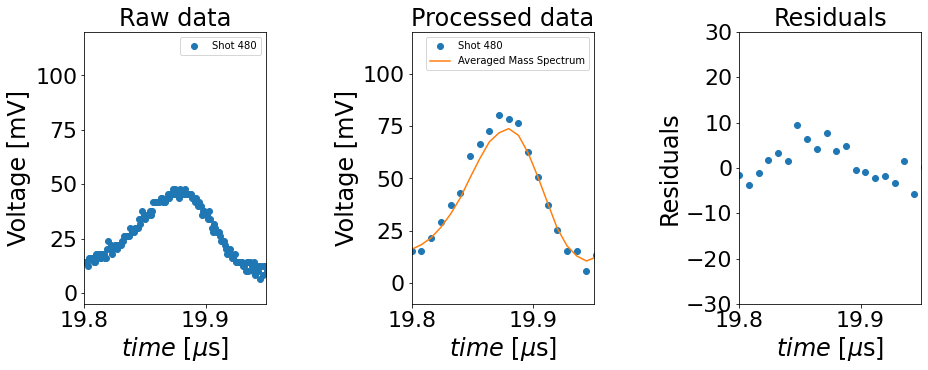

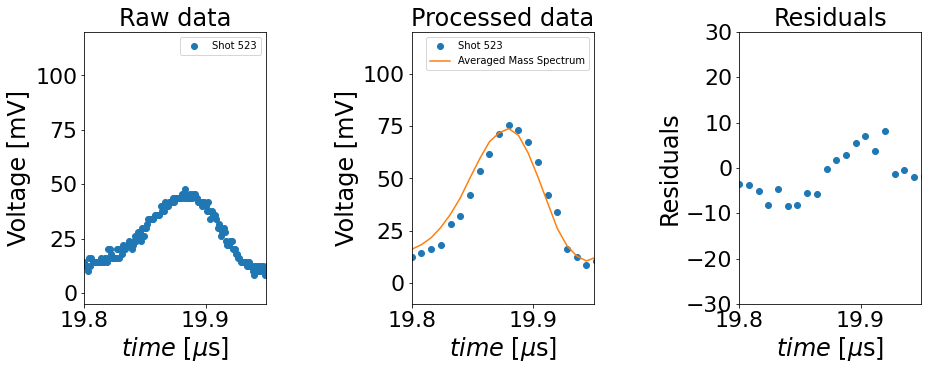

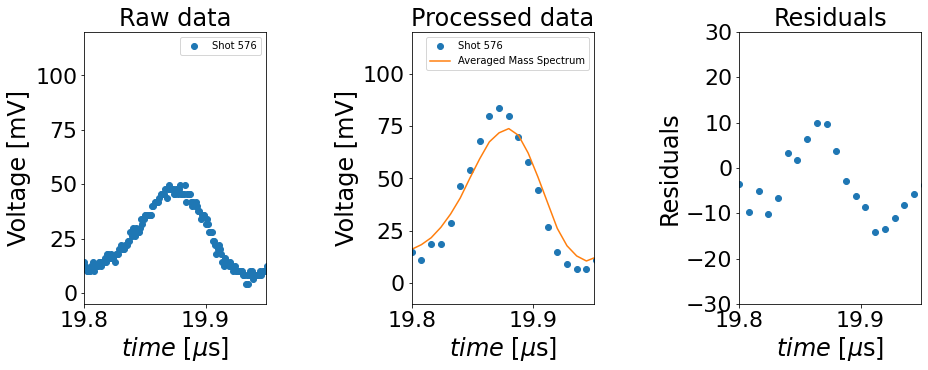

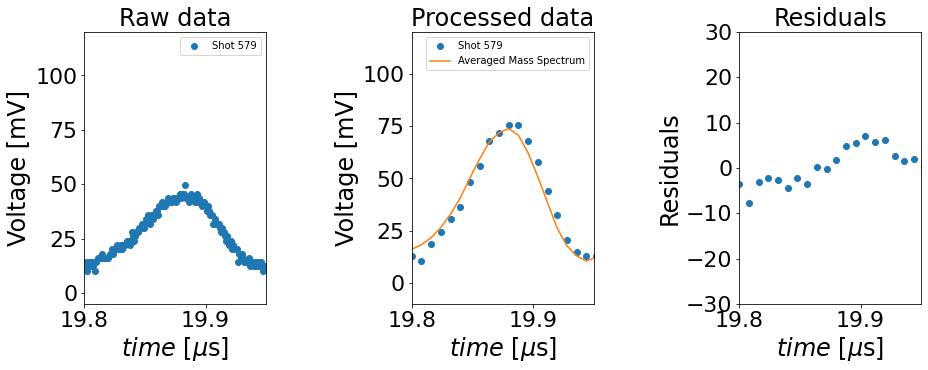

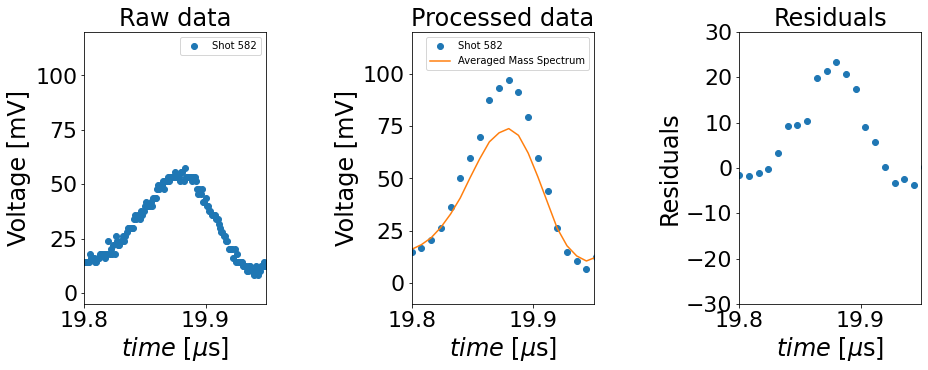

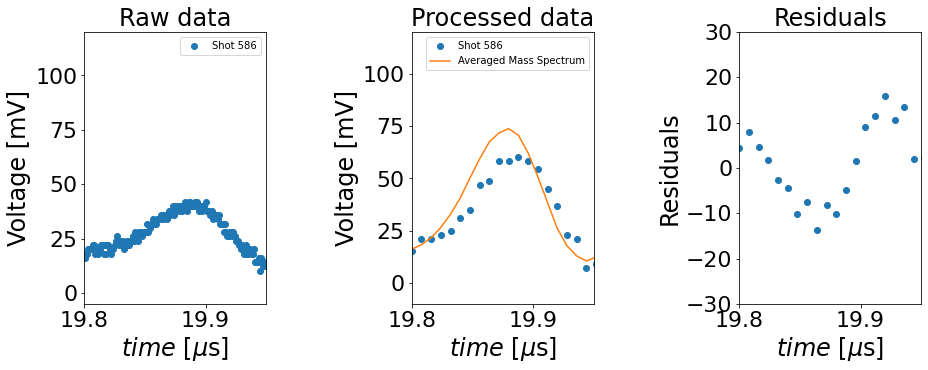

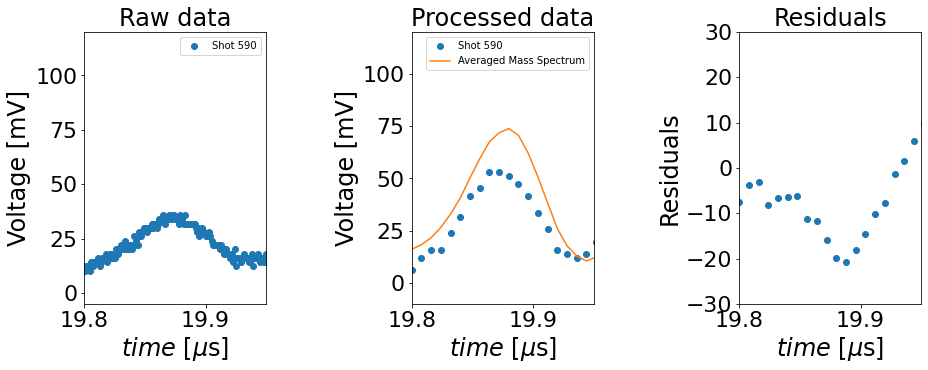

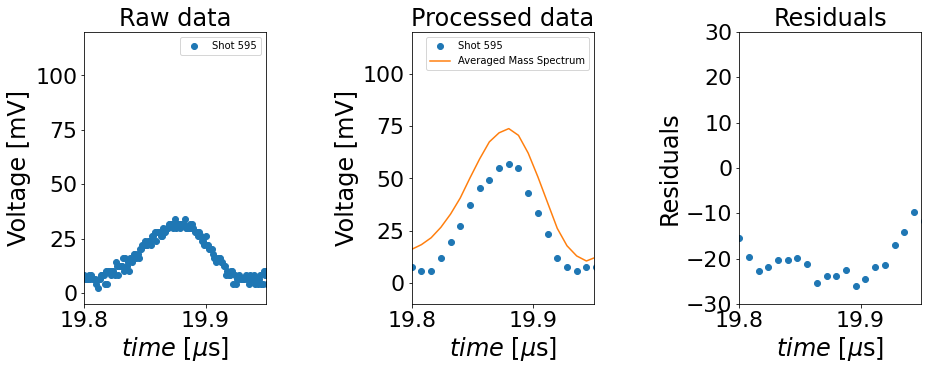

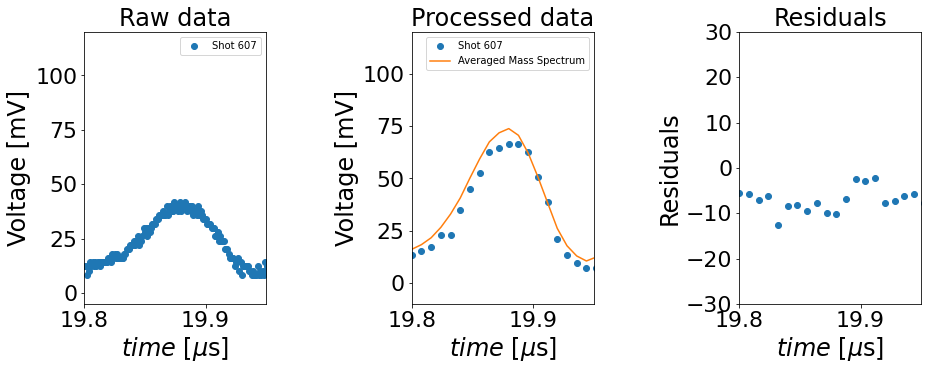

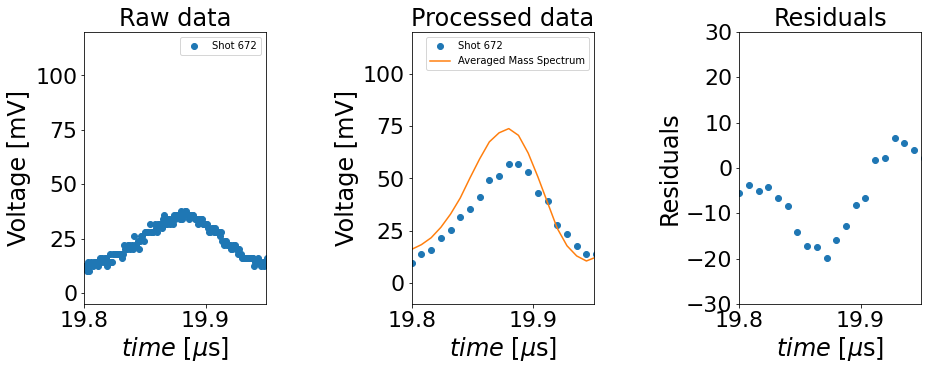

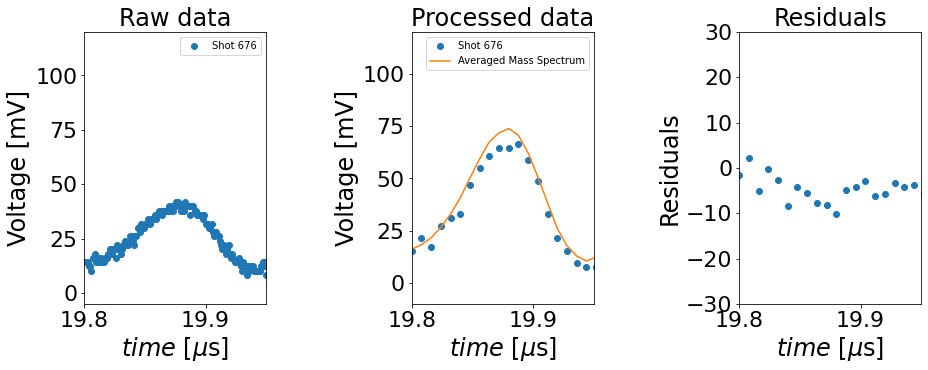

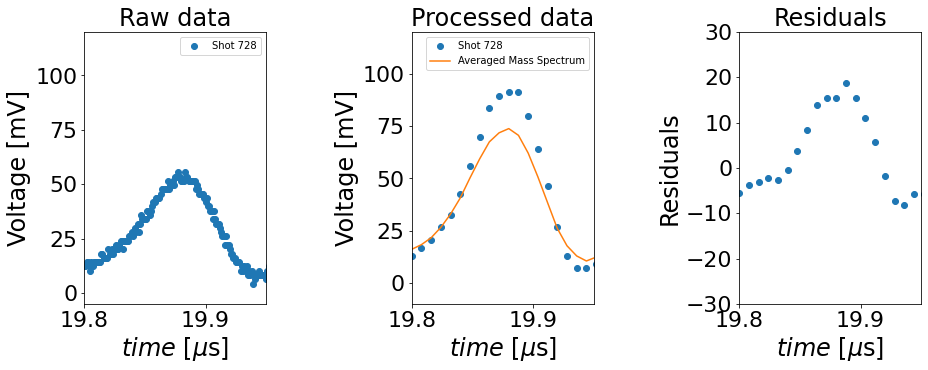

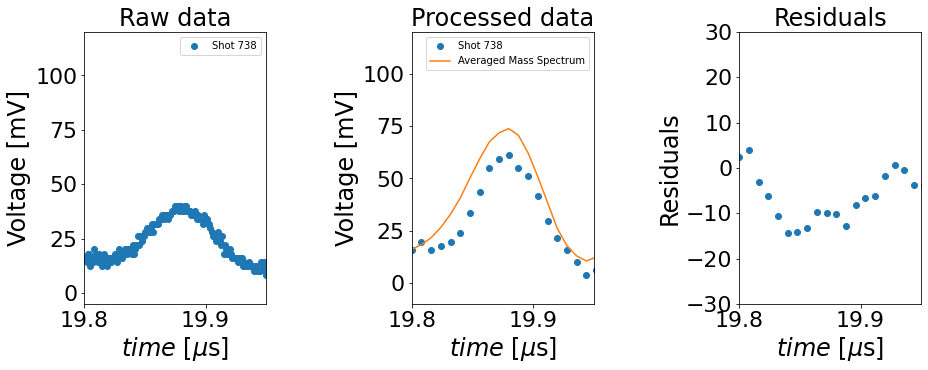

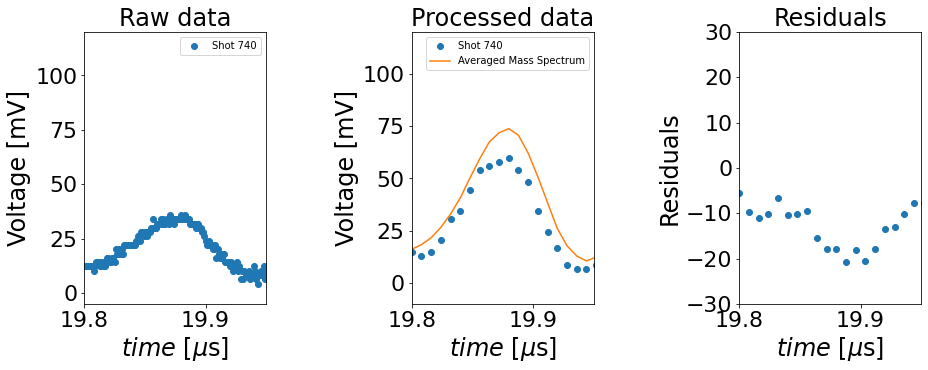

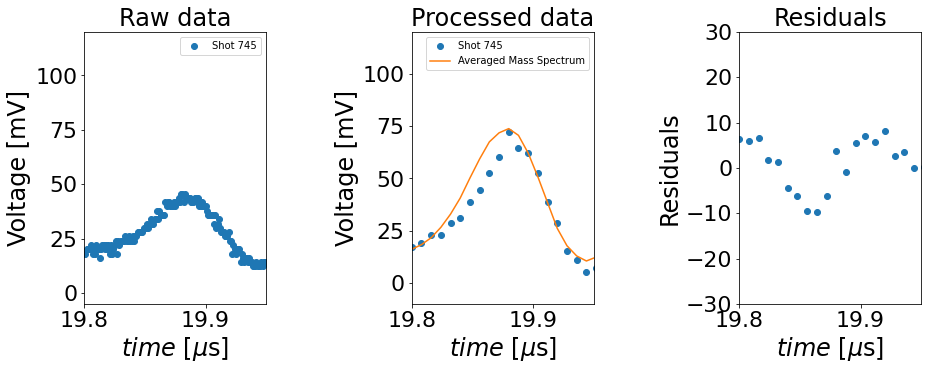

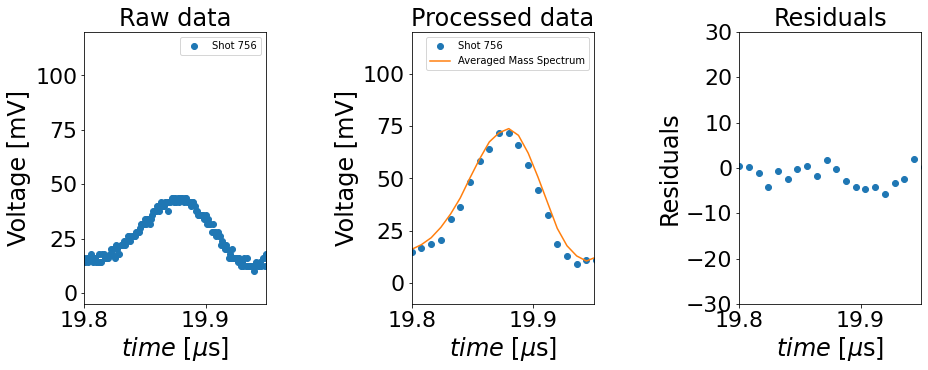

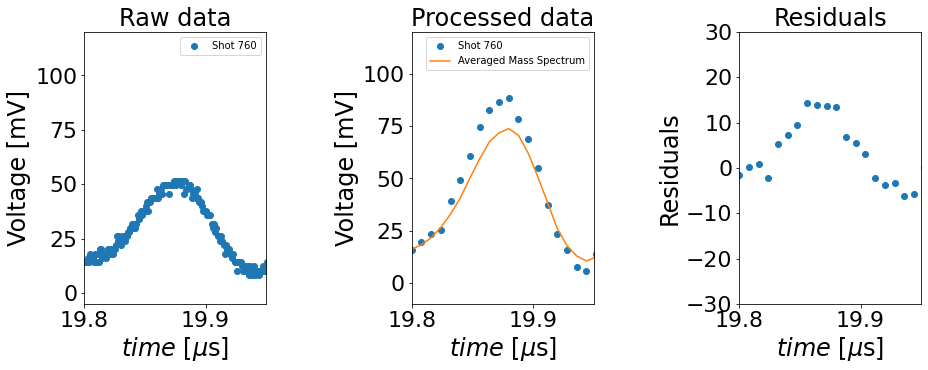

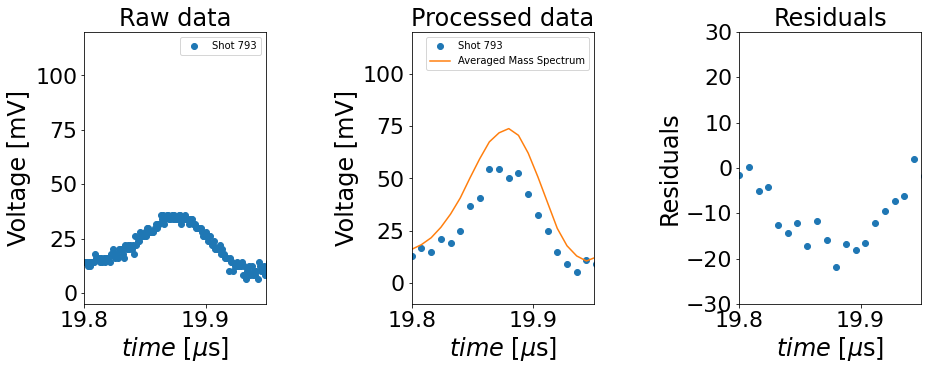

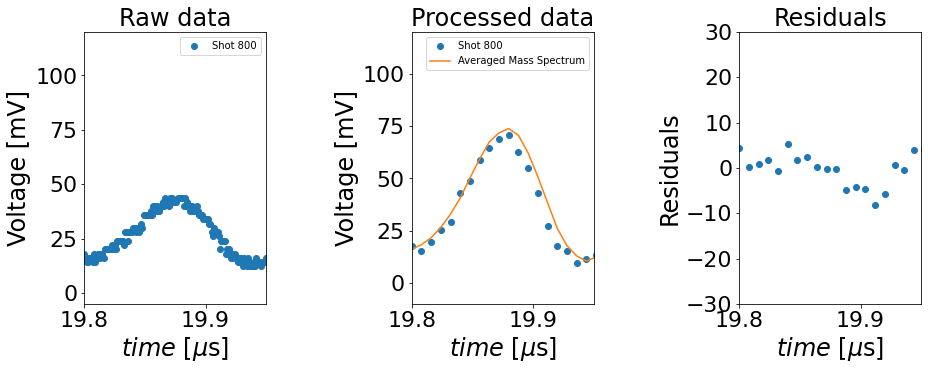

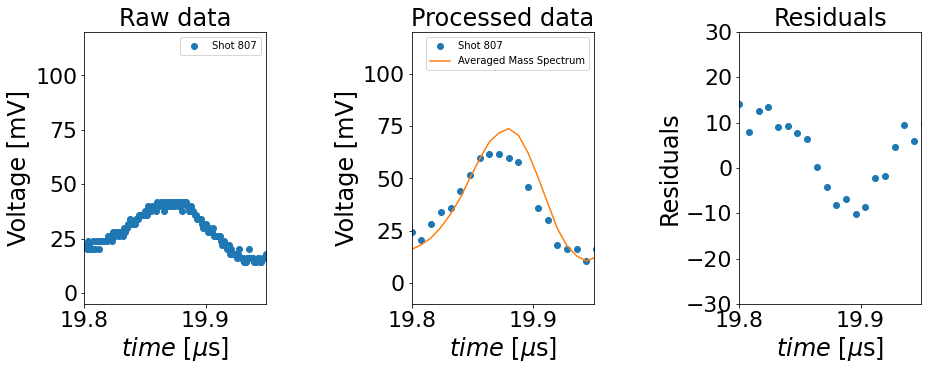

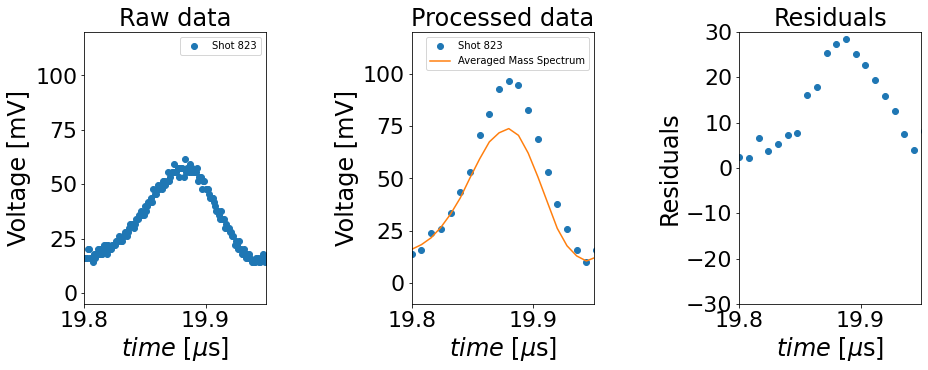

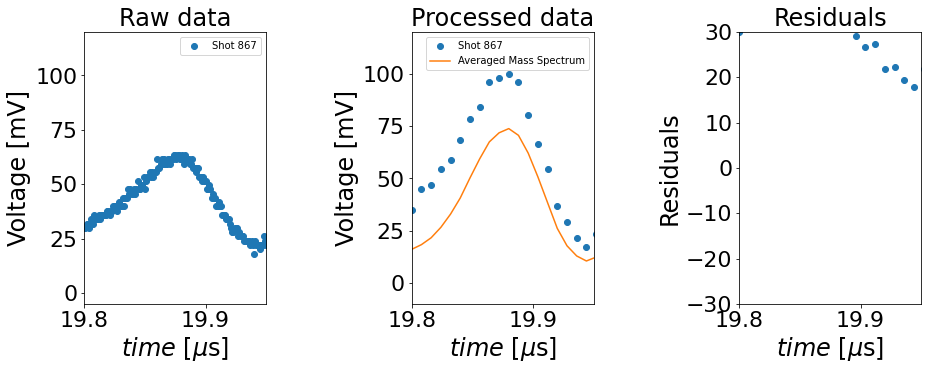

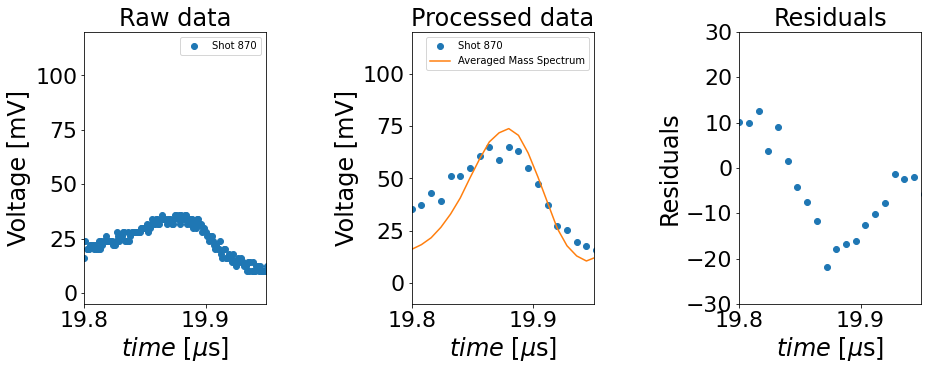

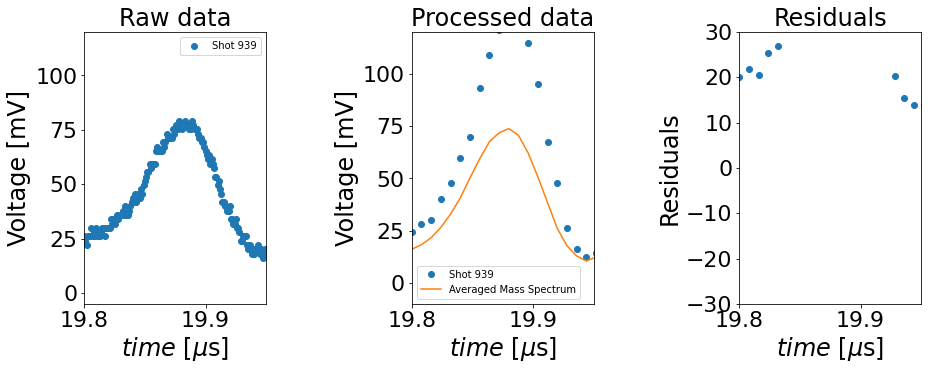

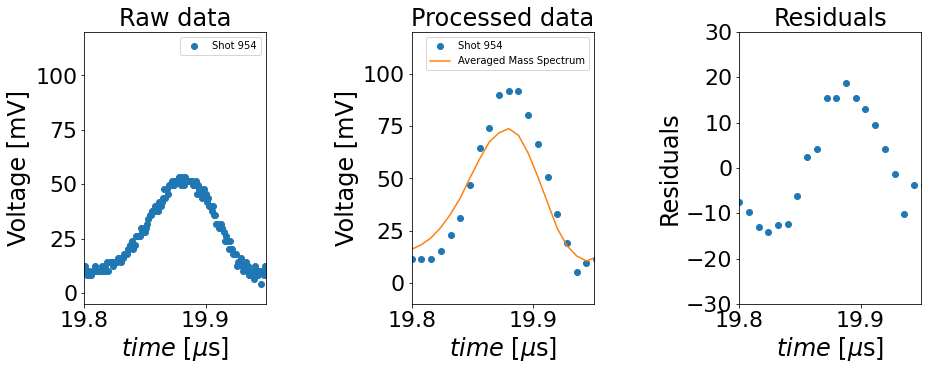

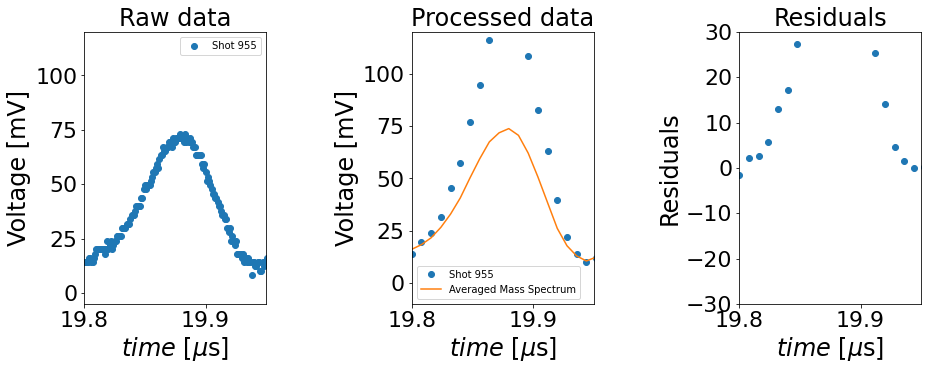

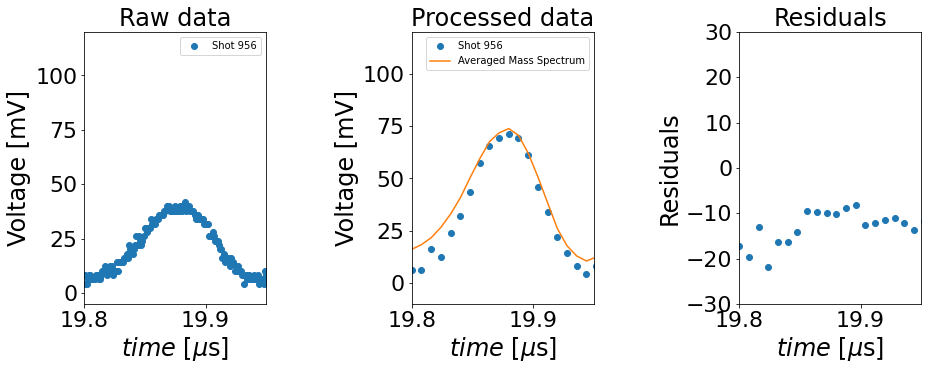

In [99]:
# exp.pub_mode(fontsize=12, titlesize=14)

fontsize = 24
xlim1 = 19.8
xlim2 = 19.95
xticks = np.arange(xlim1, xlim2, 0.1)

for ind, i in enumerate(v_30_rs2):
    fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=None)
    
    legend1 = f"Shot {intensity_30[ind]+1}"
    ax1.set_title('Raw data', fontsize=fontsize)
    ax1.plot(t_30, v_30[ind], marker='o', ls='', label=f"Shot {intensity_30[ind]+1}")
    ax1.legend()
    ax1.set_xlim((xlim1,xlim2))
    ax1.set_ylim((-5, 120))
    ax1.set_xlabel("$time$ [$\mu$s]", fontsize=fontsize)
    ax1.set_ylabel("Voltage [mV]", fontsize=fontsize)
    ax1.set_xticks(xticks)
    ax1.tick_params(labelsize=22)

    ax2.set_title('Processed data', fontsize=fontsize)
    ax2.plot(t_30_rs, i, marker='o', ls='', label=f"Shot {intensity_30[ind]+1}")
    ax2.plot(t_30_rs, mean_mass_spectrum, label='Averaged Mass Spectrum')
    ax2.legend()
    ax2.set_xlim((xlim1,xlim2))
    ax2.set_ylim((-10, 120))
    ax2.set_xlabel("$time$ [$\mu$s]", fontsize=fontsize)
    ax2.set_ylabel("Voltage [mV]", fontsize=fontsize)
    ax2.set_xticks(xticks)
    ax2.tick_params(labelsize=22)
    
    ax3.set_title("Residuals", fontsize=fontsize)
    ax3.scatter(t_30_rs, res_30[ind])
    ax3.set_xlim((xlim1,xlim2))
    ax3.set_ylim((-30, 30))
    ax3.set_xlabel("$time$ [$\mu$s]", fontsize=fontsize)
    ax3.set_ylabel("Residuals", fontsize=fontsize)
    ax3.set_xticks(xticks)
    ax3.tick_params(labelsize=22)

#   plt.savefig('shot19_fit_v4.png', bbox_inches='tight')
    plt.show()

##  Normalization
##### performed with integrate.simps on each mass spectrum. Such method reduce the impact of a single spectrum on 

In [100]:
#average mass spectrum from the dataset in v_30_rs2
mean_mass_spectrum=np.mean(v_30_rs2, axis=0)

In [101]:
# this number is the integral calculated from the mean spectrum. 
# The mean spectrum is the average from the integral_spectra
MMS_integral = simps(mean_mass_spectrum, dx=0.08)
MMS_integral

61.24798337504852

In [102]:
# simpson integration rule, alternatively trapez rule.Each bradykinin signal is represented as an number. 
# this number is the area under the peak
integral_spectra=[simps(i, dx=0.08) for i in v_30_rs2]

###### relative_integral_area

In [103]:
#the ratio between each single shot integral and the mean_mass_spectrum integral
relative_integral_area = integral_spectra/MMS_integral
relative_integral_area

array([0.74941347, 0.73833738, 0.99460946, 0.81176135, 0.95841977,
       1.17596806, 1.05482046, 1.13606033, 1.14809809, 1.05354836,
       0.96037777, 0.96173135, 1.01505019, 1.17989673, 0.89761056,
       0.73003014, 0.6651434 , 0.89326002, 0.82089761, 0.90748429,
       1.14318532, 0.76905836, 0.77901869, 0.89263618, 0.91568197,
       1.11721174, 0.70058918, 0.91605377, 0.92413829, 1.22719003,
       1.51730967, 1.10276681, 1.63772708, 1.07914124, 1.5597269 ,
       0.86604597])

#### Weights for lmfit (package)

In [104]:
#function which allows to produce a 'reduced chi-aquare' by changing the errorbars
def errorbars_from_relWeight(res_object, weights):
    _g_ = np.sqrt(1./res_object.redchi)
    _sigma_ = 1./weights/_g_
    return _sigma_

In [105]:
#Weight = square root of the integral of a bradykinin signal
sqrt_weights = np.sqrt(integral_spectra)
sqrt_weights

array([ 6.77495859,  6.72470636,  7.80498711,  7.05115208,  7.66167594,
        8.48679397,  8.03776249,  8.34154688,  8.38562417,  8.0329143 ,
        7.66949815,  7.67490101,  7.88478137,  8.50095849,  7.41463664,
        6.68676857,  6.38268689,  7.39664621,  7.09072091,  7.45530566,
        8.36766369,  6.86318247,  6.90748316,  7.39406288,  7.4889034 ,
        8.27205935,  6.55054766,  7.49042364,  7.52340393,  8.6696548 ,
        9.64013264,  8.2184088 , 10.01536226,  8.12989698,  9.77395147,
        7.28310163])

In [106]:
xvals=np.arange(0,12)

##### (v_30_rs2)*(relative_integral_area) = (weighted_integral_list)

In [107]:
#this for loop produces a list with the normaliized signle shot bradykinin integrals
#weighted_integral is produced by the upper command line. product of integral_spectra/MMS_integral
#NUMPY ARRAY
k = 0
weighted_integral_list = []
for i in v_30_rs2:
    end_result = i/relative_integral_area[k]
    k = k + 1
    weighted_integral_list.append(end_result)
weighted_integral_list = np.array(weighted_integral_list)

In [108]:
#this for loop produces a list with the normalized signle shot bradykinin integrals
#weighted_integral is produced by the upper command line. product of integral_spectra/MMS_integral
#REGULAR LIST
# k = 0
# weighted_integral_list = []
# for i in v_30_rs2:
#     end_result = i/relative_integral_area[k]
#     k = k + 1
#     weighted_integral_list.append(end_result)

##### List Modification, transpose the array

In [109]:
#SLICING NUMPY ARRAY. sELECTION OF A SINGLE BIN (optional)
weighted_integral_list[:,0]

array([13.20949307, 25.78302345,  9.56546489, 10.72700386, 14.03535996,
       19.78891955, 19.070815  , 25.29279388, 20.08827164, 14.61171365,
       12.83928809, 15.33772093, 12.43831069, 12.34221626, 16.90220323,
        8.14997221, 11.64710985, 14.82617931, 11.87644546, 16.97595596,
       11.19534094, 20.54741415, 18.83822405, 19.11252563, 16.18526466,
       13.9268605 , 18.51890366, 19.05081924, 26.21553405, 11.30882255,
       23.07619323, 32.01142531, 14.82660242, 10.44444658,  8.89765744,
        7.23684464])

In [110]:
#comparison between the original (v_30_rs2) and the (weighted_integral_list)
np.array(v_30_rs2)[:,0]

array([ 9.89937208, 19.03657003,  9.51390189,  8.70776714, 13.45176649,
       23.27113725, 20.11628579, 28.73413981, 23.06330632, 15.3941469 ,
       12.33056689, 14.75076699, 12.62550965, 14.56254061, 15.17159607,
        5.94972536,  7.74699825, 13.24363328,  9.74934566, 15.4054133 ,
       12.79834945, 15.80216064, 14.67532855, 17.06053188, 14.82055504,
       15.55925202, 12.97414358, 17.45157484, 24.22677887, 13.87807424,
       35.01373111, 35.30113739, 24.28192835, 11.27103305, 13.87791567,
        6.26744017])

In [111]:
#fUNCTION FOR A SLICING AND SELECTION OF A SINGLE BIN
bin_lst = np.transpose(weighted_integral_list)
bin_lst[0]

array([13.20949307, 25.78302345,  9.56546489, 10.72700386, 14.03535996,
       19.78891955, 19.070815  , 25.29279388, 20.08827164, 14.61171365,
       12.83928809, 15.33772093, 12.43831069, 12.34221626, 16.90220323,
        8.14997221, 11.64710985, 14.82617931, 11.87644546, 16.97595596,
       11.19534094, 20.54741415, 18.83822405, 19.11252563, 16.18526466,
       13.9268605 , 18.51890366, 19.05081924, 26.21553405, 11.30882255,
       23.07619323, 32.01142531, 14.82660242, 10.44444658,  8.89765744,
        7.23684464])

In [112]:
len(bin_lst)

20

### function for the generation of reduced chi-square = 1. 
##### first line: reslinmod suggest the reduced chi-square
##### second line: function errorbars_from_relWeight is used to get modified_sigmas producing reduced chi-square = 1
##### third line: the modified_sigma is append to a list

In [113]:
modified_weights, modified_sigmas, mean_values = [], [], []
for i in range(len(t_30_rs)):
    params = linmod.guess(bin_lst[i],x=xvals)
    reslinmod = linmod.fit(bin_lst[i],x=xvals,weights=sqrt_weights, params=params)
    modified_sigma = errorbars_from_relWeight(reslinmod, sqrt_weights)
    modified_sigmas.append(modified_sigma) # needed only for checking
    modified_weight = 1/modified_sigma
    reslinmod_modified = linmod.fit(bin_lst[i],x=xvals,weights=modified_weight) # needed only for checking
    modified_weights.append(modified_weight) # needed only for checking
    mean_values.append(reslinmod_modified.values['c'])
    #print(reslinmod_modified.values['c']) # needed only for checking

#####  Simple extension of relative_integral_area in form of multiple arrays 

In [114]:
mod_factor_for_modified_sigmas = np.array(v_30_rs2)/weighted_integral_list
#mod_factor_for_modified_sigmas.transpose()

In [115]:
# modified_sigmas_without_integral_weight is an array where 
modified_sigmas_without_integral_weight = modified_sigmas*mod_factor_for_modified_sigmas.transpose()

In [116]:
modified_weights_without_integral_weight = modified_weights*mod_factor_for_modified_sigmas.transpose()

##### Calculate ${\sigma}_{sys}^{2}$.
$$ {\sigma}_{sys}^{2} = ({\frac{{\Sigma}_{i=1}^{N}{\sigma}_{i}}{N-1}})^{2} $$

In [117]:
sigma_sqr_sys = np.square(np.sum([i for ind, i in enumerate(noise_30)])/(len(noise_30)-1))
sigma_sqr_sys

2.5633646371070697

##### $${\sigma}_{unknown}^{2} = {\sigma}_{peak}^{2} - {\sigma}_{sys}^{2}$$

In [118]:
sigma_unknown = np.sqrt(np.square(modified_sigmas)-sigma_sqr_sys)

<div class="alert alert-block alert-info"><b>Ploting the results</b></div>

### Relative Integral removed after Sigma Calculation

In [119]:
%matplotlib inline
params = powLawModel.guess(np.transpose(np.array(v_30_rs2)).flatten(), x=modified_sigmas_without_integral_weight.flatten())
params["exponent"].set(value=0.5,vary=False)
params["amplitude"].set(value=10,vary=True)
modified_sigmas_without_integral_weight2=modified_sigmas_without_integral_weight.transpose()

(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

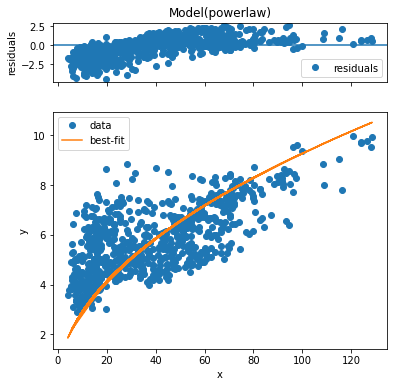

In [120]:
my_fit=powLawModel.fit(modified_sigmas_without_integral_weight2.flatten(), x=np.array(v_30_rs2).flatten(),params=params)
my_fit.plot()

In [121]:
my_fit.result

In [122]:
#para = linmod.guess(weighted_integral_list[:,5],x=xvals)

In [123]:
plt.close('all')

In [124]:
# plt.scatter(np.array(v_30_rs2).transpose(), modified_sigmas_without_integral_weight, color='orange')
# plt.xlabel('absolute voltage [mV]')
# plt.ylabel('modified_sigmas_without_integral_weight')
# plt.title('Relative Integral removed after calculation')

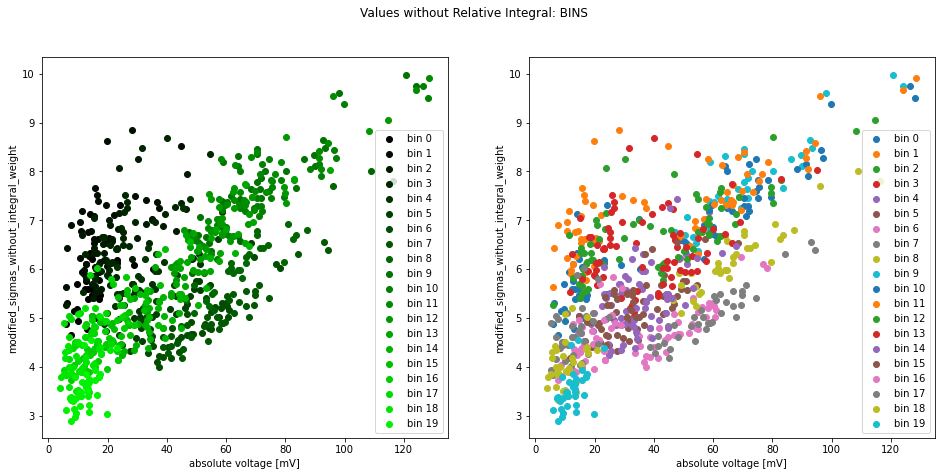

In [125]:
x =1
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(16,7))
#plt.figure(figsize=(10,7))
plt.xlabel('absolute voltage [mV]')
axs1.set(xlabel='absolute voltage [mV]', ylabel='modified_sigmas_without_integral_weight')
plt.ylabel('modified_sigmas_without_integral_weight')
fig.suptitle('Values without Relative Integral: BINS')
for i in list(range(0, len(modified_sigmas_without_integral_weight))):
    axs1.scatter(np.array(v_30_rs2).transpose()[i:i+1], modified_sigmas_without_integral_weight[i:i+1], label= '{} {}'.format('bin', i), color = (0, i / 20.0, 0, 1))
    axs2.scatter(np.array(v_30_rs2).transpose()[i:i+1], modified_sigmas_without_integral_weight[i:i+1], label= '{} {}'.format('bin', i))
    plt.legend()
    axs1.legend()

Text(0.5, 1.0, 'Mean Mass Spectrum Bradykinin Signal')

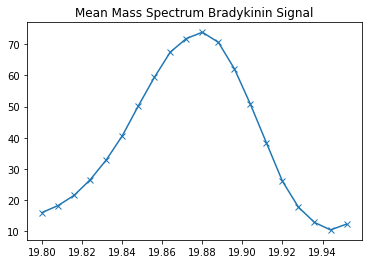

In [161]:
plt.plot(t_30_rs, mean_mass_spectrum, marker='x')
plt.title('Mean Mass Spectrum Bradykinin Signal')

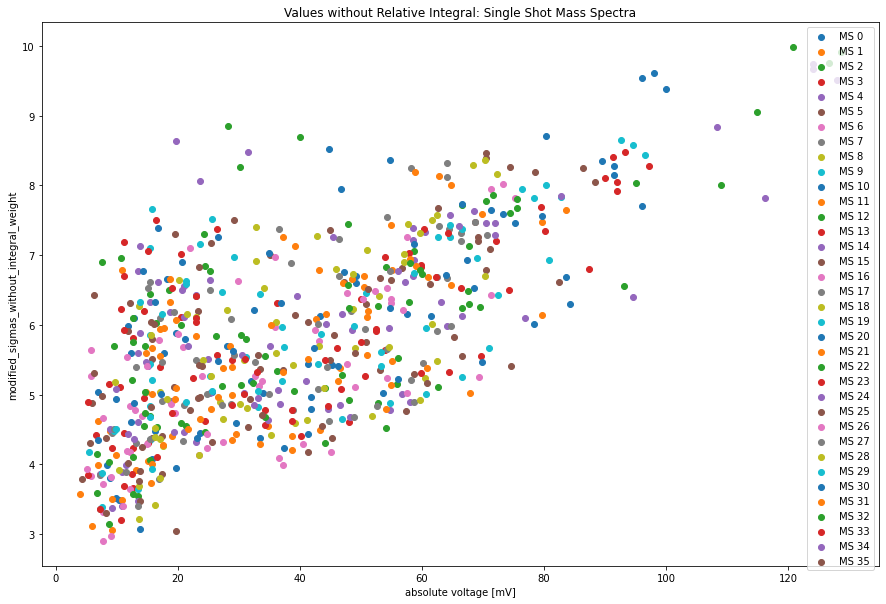

In [127]:
x =50
plt.figure(figsize=(15,10))
plt.xlabel('absolute voltage [mV]')
plt.ylabel('modified_sigmas_without_integral_weight')
plt.title('Values without Relative Integral: Single Shot Mass Spectra')
for i in list(range(0, len(modified_sigmas_without_integral_weight.transpose()))):
    plt.scatter(np.array(v_30_rs2)[i:i+1], modified_sigmas_without_integral_weight.transpose()[i:i+1], label= '{} {}'.format('MS', i))
    plt.legend()

In [128]:
len(modified_sigmas_without_integral_weight) == len(np.array(v_30_rs2).transpose())

True

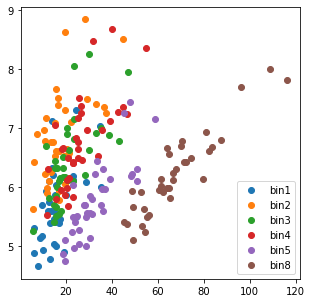

In [129]:
#this code is only for checking purpuses
x = np.array(v_30_rs2).transpose()[0:1]
y = modified_sigmas_without_integral_weight[0:1]
x2 = np.array(v_30_rs2).transpose()[1:2]
y2 = modified_sigmas_without_integral_weight[1:2]
x3 = np.array(v_30_rs2).transpose()[2:3]
y3 = modified_sigmas_without_integral_weight[2:3]
x4 = np.array(v_30_rs2).transpose()[3:4]
y4 = modified_sigmas_without_integral_weight[3:4]
x5 = np.array(v_30_rs2).transpose()[4:5]
y5 = modified_sigmas_without_integral_weight[4:5]
x8 = np.array(v_30_rs2).transpose()[8:9]
y8 = modified_sigmas_without_integral_weight[8:9]
plt.figure(figsize=(5,5))
plt.scatter(x, y, label='bin1')
plt.scatter(x2,y2, label='bin2')
plt.scatter(x3,y3, label='bin3')
plt.scatter(x4,y4, label='bin4')
plt.scatter(x5,y5, label='bin5')
plt.scatter(x8,y8, label="bin8")
plt.legend()
plt.show()

### Datasets are used with the relative integral 

In [130]:
params = powLawModel.guess(bin_lst.flatten(), x=sigma_unknown)
params["exponent"].set(value=0.5,vary=False)
params["amplitude"].set(value=10,vary=True)
sigma_unknown2 = np.array(sigma_unknown).transpose()

(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

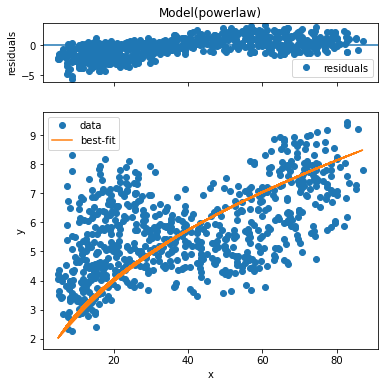

In [131]:
my_fit=powLawModel.fit(sigma_unknown.flatten(), x=bin_lst.flatten(),params=params)
my_fit.plot()

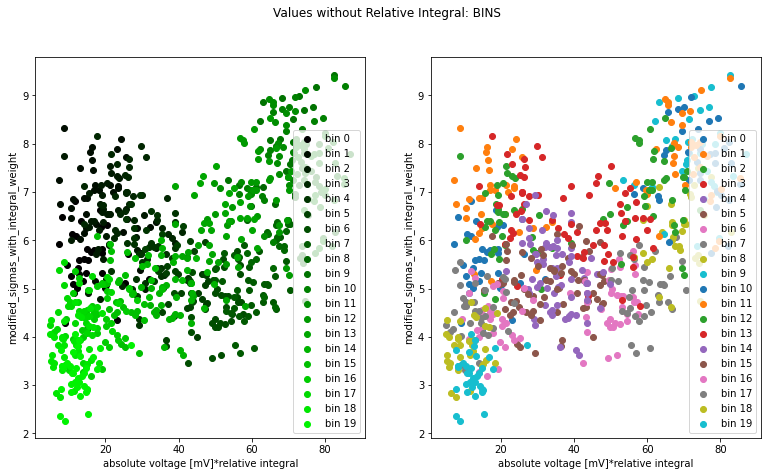

In [132]:
x =1
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(13,7))
#plt.figure(figsize=(10,7))
plt.xlabel('absolute voltage [mV]*relative integral')
axs1.set(xlabel='absolute voltage [mV]*relative integral', ylabel='modified_sigmas_with_integral_weight')
plt.ylabel('modified_sigmas_with_integral_weight')
fig.suptitle('Values without Relative Integral: BINS')
for i in list(range(0, len(modified_sigmas_without_integral_weight))):
    axs1.scatter(bin_lst[i:i+1], sigma_unknown[i:i+1], label= '{} {}'.format('bin', i), color = (0, i / 20.0, 0, 1))
    axs2.scatter(bin_lst[i:i+1], sigma_unknown[i:i+1], label= '{} {}'.format('bin', i))
    plt.legend()
    axs1.legend()

In [133]:
y_divided_by_x = modified_sigmas_without_integral_weight/np.array(v_30_rs2).transpose()

In [134]:
y_divided_by_x_square_inverse = 1/(np.square(modified_sigmas_without_integral_weight/np.array(v_30_rs2).transpose()))

[]

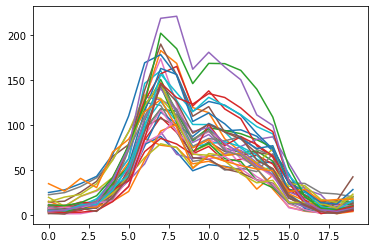

In [135]:
plt.plot(y_divided_by_x_square_inverse)
plt.plot()

In [155]:
%matplotlib inline
params = LinearModel.guess(np.transpose(np.array(v_30_rs2)).flatten(), x=y_divided_by_x_square_inverse.flatten())

(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

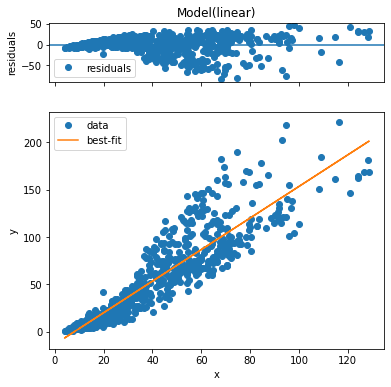

In [156]:
my_fit=LinearModel.fit(np.transpose(y_divided_by_x_square_inverse).flatten(), x=np.array(v_30_rs2).flatten(),params=params)
my_fit.plot()

In [160]:
my_fit.result

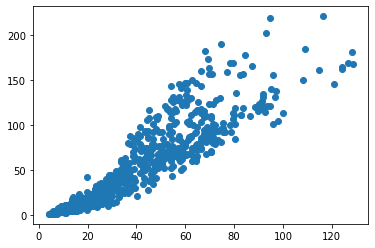

In [136]:
plt.scatter(v_30_rs2, y_divided_by_x_square_inverse.transpose())
plt.show()

### Playing with datasets

Text(0.5, 1.0, 'PARTLY applied, Relative Integral calculated')

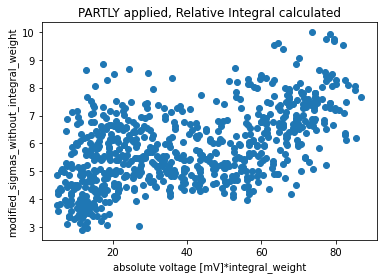

In [137]:
plt.scatter(bin_lst, modified_sigmas_without_integral_weight)
plt.xlabel('absolute voltage [mV]*integral_weight')
plt.ylabel('modified_sigmas_without_integral_weight')
plt.title('PARTLY applied, Relative Integral calculated')

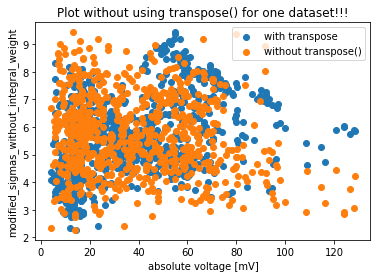

In [138]:
plt.scatter(np.array(v_30_rs2), sigma_unknown.transpose(), label='with transpose')#cause linear scattering?
plt.scatter(np.array(v_30_rs2), sigma_unknown, label="without transpose()")
plt.title('Plot without using transpose() for one dataset!!!')
plt.xlabel('absolute voltage [mV]')
plt.ylabel('modified_sigmas_without_integral_weight')
plt.legend()

Text(0.5, 1.0, 'Comparison flatten() and non-flatten() dataset')

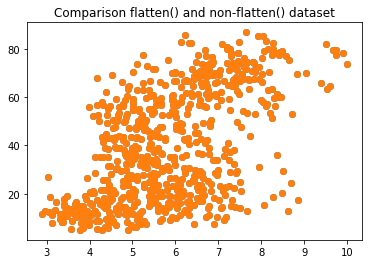

In [139]:
plt.scatter(modified_sigmas_without_integral_weight,bin_lst)
plt.scatter(modified_sigmas_without_integral_weight.flatten(), bin_lst.flatten())
plt.title('Comparison flatten() and non-flatten() dataset')

In [140]:
popt_30, pcov_30, stdevs_30, fit_30, res_30 = [], [], [], [], []

for i in v_30_rs2:
    popt, pcov = curve_fit(gauss, t_30_rs, i, p0=[40, 19.9, 0.03, 5]) # p0 = [a, mu, sigma, offset]
    popt_30.append(popt)
    pcov_30.append(pcov)
    stdevs_30.append(np.sqrt(np.diag(pcov)))
    fit = gauss(t_30_rs, *popt)
    fit_30.append(fit)
    res_30.append(i - fit)

# Remove offset from data and fit.

In [141]:
#offset_30 = [i[3] for i in popt_30]

In [142]:
#v_30_rs2 = [v_30_rs2[ind]-i for ind, i in enumerate(offset_30)]

In [143]:
#fit_30 = [fit_30[ind]-i for ind, i in enumerate(offset_30)]

In [144]:
#res_30 = [data - fit for data, fit in zip(v_30_rs2, fit_30)]

# exp.pub_mode(fontsize=12, titlesize=14)
fontsize = 24
xlim1 = 19.7
xlim2 = 20
xticks = np.arange(xlim1, xlim2, 0.1)

for ind, i in enumerate(v_30_rs2):
    fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=None)
    
    legend1 = f"Shot {intensity_30[ind]+1}"
    ax1.set_title('Raw data', fontsize=fontsize)
    ax1.plot(t_30, v_30[ind], marker='o', ls='', label=f"Shot {intensity_30[ind]+1}")
    ax1.legend()
    ax1.set_xlim((xlim1,xlim2))
    ax1.set_ylim((-5, 120))
    ax1.set_xlabel("$time$ [$\mu$s]", fontsize=fontsize)
    ax1.set_ylabel("Voltage [mV]", fontsize=fontsize)
    ax1.set_xticks(xticks)
    ax1.tick_params(labelsize=22)

    ax2.set_title('Processed data', fontsize=fontsize)
    ax2.plot(t_30_rs, i, marker='o', ls='', label=f"Shot {intensity_30[ind]+1}")
    ax2.plot(t_30_rs, fit_30[ind], label='Gaussian Fit')
    ax2.legend()
    ax2.set_xlim((xlim1,xlim2))
    ax2.set_ylim((-10, 120))
    ax2.set_xlabel("$time$ [$\mu$s]", fontsize=fontsize)
    ax2.set_ylabel("Voltage [mV]", fontsize=fontsize)
    ax2.set_xticks(xticks)
    ax2.tick_params(labelsize=22)
    
    ax3.set_title("Residuals", fontsize=fontsize)
    ax3.scatter(t_30_rs, res_30[ind])
    ax3.set_xlim((xlim1,xlim2))
    ax3.set_ylim((-20, 20))
    ax3.set_xlabel("$time$ [$\mu$s]", fontsize=fontsize)
    ax3.set_ylabel("Residuals", fontsize=fontsize)
    ax3.set_xticks(xticks)
    ax3.tick_params(labelsize=22)

#   plt.savefig('shot19_fit_v4.png', bbox_inches='tight')
    plt.show()

Choose three bins.

In [145]:
#for ind, i in enumerate(t_30_rs):
    #print(ind, i)

In [146]:
points = [10, 20, 24]

t_points = [t_30_rs[i] for i in points]

v_points = []

for v in v_30_rs:
    v_points.append([v[i] for i in points])
    
fit_points = []

for f in fit_30:
    fit_points.append([f[i] for i in points])
    
res_points = []

for r in res_30:
    res_points.append([r[i] for i in points])

IndexError: index 20 is out of bounds for axis 0 with size 20

In [ ]:
# exp.pub_mode(fontsize=12, titlesize=14)

for ind, i in enumerate(v_points[:1]):
    fig, [ax1,ax2] = plt.subplots(nrows=2, ncols=1, figsize=(7,10))

    ax1.plot(t_points, i, marker='o', ls='', label='data')
    ax1.plot(t_points, fit_points[ind], marker='o', ls='', label='fit', color='orange')
    ax1.plot(t_30_rs, fit_30[ind], label='fit', color='orange')
    ax1.legend()
    ax1.set_xlim((xlim1,xlim2))
    ax1.set_ylim((-5, 80))
    ax1.set_xlabel("$t$ [$\mu$s]")
    ax1.set_ylabel("Voltage [$\mu$V]")
    ax1.set_title(f"Shot {intensity_30[ind]+1}, mean_mass_spectrum")
    
    ax2.set_title("Residuals")
    ax2.scatter(t_points, res_points[ind], color='red')
    ax2.set_xlim((xlim1, xlim2))
    ax2.set_ylim((-20, 20))
    ax2.set_xlabel("$t$ [$\mu$s]")
    ax2.set_ylabel("Residuals")

#   plt.savefig('shot19_3bins_v4.png', bbox_inches='tight')
    plt.show()

In [ ]:
for ind, i in enumerate(res_points):
    print(i)

The formula is

$$ {\sigma}_{peak}^{2} = {\sigma}_{sys}^{2} + {\sigma}_{unknown}^{2} $$
    
and therefore

$$ {\sigma}_{unknown}^{2} = {\sigma}_{peak}^{2} - {\sigma}_{sys}^{2} $$
    
where

$$ {\sigma}_{peak}^{2} = RMSE^{2} = \frac{{\Sigma}{(residual)}^{2}}{N-1} $$ 
    
and 

$$ {\sigma}_{sys}^{2} = ({\frac{{\Sigma}_{i=1}^{N=17}{\sigma}_{i}}{N-1}})^{2} $$

Define the number of samples (number of spectra).

In [ ]:
N = len(res_points)

print(N)

In [ ]:
res_points

## Calculate ${\sigma}_{peak}^{2}$ for each of the 3 bins in the peak.

In [ ]:
sigma_sqr_peak_1 = np.sum([np.square(i[0]) for ind, i in enumerate(res_points)])/(N-1)

print(sigma_sqr_peak_1)

sigma_sqr_peak_2 = np.sum([np.square(i[1]) for ind, i in enumerate(res_points)])/(N-1)

print(sigma_sqr_peak_2)

sigma_sqr_peak_3 = np.sum([np.square(i[2]) for ind, i in enumerate(res_points)])/(N-1)

print(sigma_sqr_peak_3)

In [ ]:
fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3, figsize=(15,7))

x = np.arange(len(res_points))

ax1.plot(x, [i[0] for i in res_points], ls='', marker='o')
ax1.set_xticks(x)
ax1.set_xlabel("Peak #")
ax1.set_ylabel("Residual (data-fit)")
ax1.set_title("Bin 1 (left side of the peak)")

ax2.plot(x, [i[1] for i in res_points], ls='', marker='o')
ax2.set_xticks(x)
ax2.set_xlabel("Peak #")
ax2.set_ylabel("Residual (data-fit)")
ax2.set_title("Bin 2 (middle of the peak)")

ax3.plot(x, [i[2] for i in res_points], ls='', marker='o')
ax3.set_xticks(x)
ax3.set_xlabel("Peak #")
ax3.set_ylabel("Residual (data-fit)")
ax3.set_title("Bin 3 (right side of the peak)")

# plt.savefig("residuals.png", bbox_inches='tight')

## Calculate ${\sigma}_{sys}^{2}$.

In [ ]:
sigma_sqr_sys = np.square(np.sum([i for ind, i in enumerate(noise_30)])/(N-1))

print(sigma_sqr_sys)

## Calculate ${\sigma}_{unknown}^{2}$ for each of the 3 bins.

In [ ]:
sigma_sqr_unk_1 = sigma_sqr_peak_1 - sigma_sqr_sys

print(sigma_sqr_unk_1)

In [ ]:
sigma_sqr_unk_2 = sigma_sqr_peak_2 - sigma_sqr_sys

print(sigma_sqr_unk_2)

In [ ]:
sigma_sqr_unk_3 = sigma_sqr_peak_3 - sigma_sqr_sys

print(sigma_sqr_unk_3)

For the Poisson distribution,

$$ {\mu} = {\sigma}^{2} = {\lambda} $$

${\lambda}$ is the event rate or the average number of events in an interval.

Calculate the relative error/coefficient of variation for central bin.

$$ C_{v} = \frac{\sigma}{\mu} = \frac{\sigma}{\lambda} = \frac{\sqrt{\lambda}}{\lambda} = \frac{1}{\sqrt{\lambda}} $$

In [ ]:
v_point2 = [v[1] for v in fit_points]

mean_v_point2 = np.mean(v_point2)

print(f"mean_v_point2 = {mean_v_point2}")

constant_2 = mean_v_point2 / sigma_sqr_unk_2

Cv_2 = np.sqrt(sigma_sqr_unk_2) / mean_v_point2

print(f"Cv_2 = {Cv_2}")

lambda_2 = np.square(1 / Cv_2)

print(f"lambda_2 = {lambda_2}")

k = lambda_2 / mean_v_point2

print(f"k = {k}")

Now, we know that 41 $\mu$V corresponds to 67 ions, and the constant of proportionality is 1.628.

In [ ]:
k_test = 3.7

In [ ]:
t_peak = t_30_rs[12:30] # bins included in the peak width

print(t_peak, len(t_peak))

In [ ]:
t_30_rs

In [ ]:
v_peak = [arr[12:30] for arr in v_30_rs2] 

In [ ]:
lambdas = np.mean(v_peak, axis=0) * k_test

# lambdas = [math.floor(i) for i in lambdas]

print(lambdas)

In [ ]:
total_ions = np.sum(lambdas)

print(total_ions)

In [ ]:
len(t_peak)

In [ ]:
popt_ion, pcov_ion = curve_fit(gauss, t_peak, lambdas, p0=[280, 19.88, 0.03, 0]) # p0 = [a, mu, sigma, offset] # [67, 21.7, 0.03, 0]

In [ ]:
stdevs_ion = np.sqrt(np.diag(pcov_ion))

In [ ]:
fit_ion = gauss(t_peak, *popt_ion)

In [ ]:
res_ion = lambdas - fit_ion

In [ ]:
fit_ion

In [ ]:
popt_ion

In [ ]:
exp.pub_mode(fontsize=12, titlesize=14)
plt.figure(figsize=(15,10))
plt.plot(t_peak, lambdas, ls='', marker='o', label='data')
plt.plot(t_peak, fit_ion, label='gaussian fit')
plt.legend()
plt.title(f"Average number of ions vs. $t$ for a peak with height 54 mV ({44})")
# plt.yticks(np.arange(0, 80, 10))
plt.ylabel("Average number of ions")
plt.xlabel("$t$ [$\mu$s]")
# plt.savefig("lambda_vs_t_corrected.png", bbox_inches='tight')
plt.show()

In [ ]:
# exp.pub_mode(fontsize=12, titlesize=14)
plt.figure(figsize=(15,10))
plt.plot(t_peak, res_ion, ls='', marker='o')
plt.xlabel("$t$ [$\mu$s]")
plt.ylabel("Residual (data-fit)")
plt.title("Residuals")
# plt.savefig("lambda_vs_t_res.png", bbox_inches='tight')
plt.show()

**Chi-square/goodness of fit**

$H_0$ = the data follows a gaussian distribution

$\alpha = 0.05$

*References:*

- https://www.itl.nist.gov/div898/handbook/eda/section3/eda35f.htm

- https://stattrek.com/chi-square-test/goodness-of-fit.aspx#:~:text=The%20P%2Dvalue%20is%20the%20probability%20that%20a%20chi%2Dsquare,cannot%20accept%20the%20null%20hypothesis.

In [ ]:
scipy.stats.chisquare(f_obs=lambdas, f_exp=fit_ion, ddof=4)

In [ ]:
crit_value = scipy.stats.chi2.ppf(q=0.95, df=len(lambdas)-1-4)

print(crit_value)

$\chi^2$ < $\chi^2_{crit}$ (and $p$ > than $\alpha = 0.05$) so we fail to reject $H_0$ and the distribution is gaussian.

### Poisson simulation as sanity check for results

In [ ]:
n = 10000

lambda_sets = []

for i in range(n):
    poi_rvs = [np.random.poisson(l) for l in fit_ion]
    lambda_sets.append(poi_rvs)

In [ ]:
popt_sim, pcov_sim, stdevs_sim, fit_sim, res_sim = [], [], [], [], []

for i in range(n):
    a, b = curve_fit(gauss, t_peak, lambda_sets[i], p0=[280, 19.8, 0.03, 0]) # p0 = [a, mu, sigma, offset]
    popt_sim.append(a)
    pcov_sim.append(b)
    
    stdevs_sim.append(
        np.sqrt(np.diag(b)))
    
    f = gauss(t_peak, *a)
    r = lambda_sets[i] - f
    fit_sim.append(f)
    res_sim.append(r)

In [ ]:
for i in range(4):
    plt.figure(figsize=(15,10))
    plt.plot(t_peak, lambda_sets[i], ls='', marker='o', label='simulated data')
    plt.plot(t_peak, fit_sim[i], label='gaussian fit')
    plt.legend()
    plt.ylabel("Average number of ions")
    plt.xlabel("$t$ [$\mu$s]")
    plt.title(f"$\lambda$ simulation #{i}")
    plt.show()

In [ ]:
chisquares = [
    scipy.stats.chisquare(f_obs=l, f_exp=f, ddof=4)[0] for l, f in zip(lambda_sets, fit_sim)
]

In [ ]:
count = 0

for i in chisquares:
    if i < crit_value:
        count += 1
        
print(count)

In [ ]:
x = np.linspace(0, np.max(chisquares), n)

chi2_pdf = scipy.stats.chi2.pdf(x, df=67)

In [ ]:
exp.pub_mode(fontsize=14, titlesize=16)

plt.figure(figsize=(15,10))
n_sim, bins_sim, patches_sim = plt.hist(chisquares, edgecolor='k', density=True)
plt.title(f"Distribution of $\chi^2$ values from $\lambda$ simulations ($n$ = {n})")
plt.plot(x, chi2_pdf, label='$\chi^2$ fit, $df = 67$')
plt.axvline(crit_value, ls='dashed', color='k', zorder=2, label='$\chi^{2}_{critical}$'+f' = {crit_value:.2f}')
plt.legend()
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.ylabel("Probability", fontsize=fontsize)
plt.xlabel("$\chi^2$", fontsize=fontsize)
# plt.savefig("chi2dist_lambda_sims_corrected.png", bbox_inches='tight')
plt.show()

# https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd